In [2]:
import pandas as pd
import timeit

In [266]:
file="C:\\Users\\kasthurirangan.sampa\\Downloads\\applemobilitytrends-2020-07-18.csv"

In [267]:
data=pd.read_csv(file)

In [268]:
data.shape

(3625, 188)

In [269]:
data.columns

Index(['geo_type', 'region', 'transportation_type', 'alternative_name',
       'sub-region', 'country', '2020-01-13', '2020-01-14', '2020-01-15',
       '2020-01-16',
       ...
       '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
       '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12'],
      dtype='object', length=188)

In [270]:
temp1 = pd.melt(data, id_vars=['geo_type', 'region', 'transportation_type', 'alternative_name',
       'sub-region', 'country'], var_name='Date', value_name='Value')

In [271]:
temp1=temp1[(temp1["geo_type"]=="sub-region")&(temp1["country"]=="United States")]

In [272]:
temp1["Date"]=pd.to_datetime(temp1['Date'])

In [273]:
temp2=temp1.pivot(index='Date',columns='region', values='Value')

In [241]:
#region_list=['California','Texas','Florida','Illinois','Georgia','Nevada','Pennsylvania','Virginia','Colorado','Ohio']
region_list=['California','Texas']

In [274]:
max_date=max(temp1['Date'])
max1_Date=max(temp1['Date'])+ pd.DateOffset(1)
temp1["Date"]=pd.to_datetime(temp1['Date'])
import pmdarima as pm

In [277]:
max_date=max(temp1['Date'])
max1_Date=max(temp1['Date']) + pd.DateOffset(10)

In [278]:
max_date

Timestamp('2020-07-10 00:00:00')

In [279]:
output=pd.DataFrame()
start = timeit.default_timer()
for region in temp1.region.unique():
#for region in region_list:
    print("\n Region:",region)
    temp=temp1[temp1["region"]==region]
    temp2=temp[temp['Date']<=max_date]
    temp2=temp2[['Date', 'Value']]
    temp2 = temp2.fillna(method = 'ffill')
    temp2.set_index("Date", inplace = True) 
    model = pm.auto_arima(temp2["Value"],
                      m = 10, seasonal = True,
                      start_p = 0,start_q=0,max_order=4,test='adf',error_action = 'ignore',
                      suppress_warnings =True,
                      stepwise =True,trace = True)
    forecast = model.predict(n_periods=10,return_conf_int=True)
    forecast_range = pd.date_range(start=max1_Date,periods=10,freq='D')
    lower = pd.Series(forecast[1][:,0],index=forecast_range)
    upper = pd.Series(forecast[1][:,1],index=forecast_range)
    forecast_df = pd.DataFrame(forecast[0],index=forecast_range,columns=['Apple_mobility_Prediction'])
    forecast_df['Apple_mobility_lower']=lower
    forecast_df['Apple_mobility_upper']=upper
    forecast_df['Apple_mobility_region']=region
    output=output.append(forecast_df)
stop = timeit.default_timer()
Total_Time=(stop - start)/60 
print('Time: '+str(Total_Time)+' Minutes')  


 Region: Alabama
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1556.558, BIC=1569.308, Time=0.732 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1567.387, BIC=1573.762, Time=0.012 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1568.503, BIC=1581.253, Time=0.095 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1544.787, BIC=1557.536, Time=0.114 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1565.509, BIC=1568.696, Time=0.011 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=1557.017, BIC=1566.579, Time=0.033 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=1544.209, BIC=1560.146, Time=0.284 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=1543.667, BIC=1556.417, Time=0.131 seconds
Fit ARIMA(0,1,1)x(2,0,0,10) [intercept=True]; AIC=1544.545, BIC=1560.482, Time=0.421 seconds
Fit ARIMA(0,1,1)x(2,0,1,10) [intercept=True]; AIC=1546.068, BIC=1565.193, Time=0.607 seconds
Fit ARIM

Fit ARIMA(0,1,1)x(2,0,2,10) [intercept=True]; AIC=1402.888, BIC=1425.200, Time=1.783 seconds
Near non-invertible roots for order (0, 1, 1)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(1,0,2,10) [intercept=True]; AIC=1411.806, BIC=1427.743, Time=0.563 seconds
Near non-invertible roots for order (0, 1, 0)(1, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA(1,1,1)x(1,0,2,10) [intercept=True]; AIC=1399.826, BIC=1422.138, Time=0.785 seconds
Fit ARIMA(1,1,1)x(0,0,2,10) [intercept=True]; AIC=1400.401, BIC=1419.526, Time=0.543 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=1390.097, BIC=1409.221, Time=0.704 seconds
Near non-invertible roots for order (1, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(1,1,1)x(2,0,2,10) [intercept=True]; AIC=1368.817

Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=1359.627, BIC=1378.752, Time=0.519 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=1362.996, BIC=1378.933, Time=0.457 seconds
Fit ARIMA(0,1,0)x(1,0,2,10) [intercept=True]; AIC=1375.631, BIC=1391.568, Time=0.616 seconds
Fit ARIMA(1,1,1)x(1,0,2,10) [intercept=True]; AIC=1353.681, BIC=1375.993, Time=0.785 seconds
Fit ARIMA(1,1,1)x(0,0,2,10) [intercept=True]; AIC=1356.013, BIC=1375.137, Time=0.591 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=1362.932, BIC=1382.056, Time=0.383 seconds
Fit ARIMA(1,1,1)x(2,0,2,10) [intercept=True]; AIC=1331.703, BIC=1357.202, Time=1.910 seconds
Near non-invertible roots for order (1, 1, 1)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=1360.940, BIC=1376.877, Time=0.213 seconds
Fit ARIMA(1,1,1)x(2,0,1,10) [intercept=True]; AIC=1358.991, BIC=1381.303, Time=0.726 seconds
Fit 

Fit ARIMA(2,1,0)x(1,0,0,10) [intercept=True]; AIC=1395.727, BIC=1411.664, Time=0.211 seconds
Fit ARIMA(2,1,0)x(0,0,0,10) [intercept=True]; AIC=1410.925, BIC=1423.675, Time=0.066 seconds
Fit ARIMA(2,1,0)x(2,0,0,10) [intercept=True]; AIC=1397.210, BIC=1416.334, Time=0.584 seconds
Fit ARIMA(2,1,0)x(1,0,1,10) [intercept=True]; AIC=1397.177, BIC=1416.301, Time=0.303 seconds
Fit ARIMA(2,1,0)x(0,0,1,10) [intercept=True]; AIC=1395.651, BIC=1411.588, Time=0.134 seconds
Fit ARIMA(2,1,0)x(0,0,2,10) [intercept=True]; AIC=1397.470, BIC=1416.595, Time=0.405 seconds
Fit ARIMA(2,1,0)x(1,0,2,10) [intercept=True]; AIC=1399.115, BIC=1421.426, Time=0.841 seconds
Fit ARIMA(1,1,0)x(0,0,1,10) [intercept=True]; AIC=1425.899, BIC=1438.648, Time=0.102 seconds
Fit ARIMA(3,1,0)x(0,0,1,10) [intercept=True]; AIC=1397.615, BIC=1416.740, Time=0.157 seconds
Fit ARIMA(3,1,1)x(0,0,1,10) [intercept=True]; AIC=1398.989, BIC=1421.301, Time=0.438 seconds
Total fit time: 17.918 seconds

 Region: Connecticut
Performing stepwi

Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=1389.309, BIC=1405.246, Time=0.183 seconds
Fit ARIMA(1,1,1)x(2,0,1,10) [intercept=True]; AIC=1391.174, BIC=1413.486, Time=0.846 seconds
Fit ARIMA(1,1,0)x(1,0,2,10) [intercept=True]; AIC=1400.687, BIC=1419.811, Time=0.865 seconds
Near non-invertible roots for order (1, 1, 0)(1, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(2,1,1)x(1,0,2,10) [intercept=True]; AIC=1359.250, BIC=1384.749, Time=1.163 seconds
Fit ARIMA(2,1,1)x(0,0,2,10) [intercept=True]; AIC=1357.597, BIC=1379.909, Time=0.865 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=1355.765, BIC=1374.890, Time=0.450 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=1373.207, BIC=1389.143, Time=0.101 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=1357.475, BIC=1379.787, Time=0.503 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=1359.455, BIC=1378.579, Time=0.254 seconds
Fit 

Fit ARIMA(0,1,0)x(0,0,1,10) [intercept=True]; AIC=1462.038, BIC=1471.600, Time=0.090 seconds
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=1459.869, BIC=1469.431, Time=0.034 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=1457.155, BIC=1466.717, Time=0.046 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=1459.001, BIC=1471.751, Time=0.108 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=1459.229, BIC=1475.166, Time=0.603 seconds
Near non-invertible roots for order (0, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=1444.889, BIC=1457.639, Time=0.087 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=1446.827, BIC=1462.764, Time=0.217 seconds
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=1446.831, BIC=1462.768, Time=0.242 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=1448.815, BIC=1467.939, Time=0.459 seconds
Fit 

Fit ARIMA(2,1,0)x(1,0,0,10) [intercept=True]; AIC=1212.771, BIC=1228.708, Time=0.207 seconds
Fit ARIMA(2,1,0)x(1,0,2,10) [intercept=True]; AIC=1209.489, BIC=1231.801, Time=0.900 seconds
Near non-invertible roots for order (2, 1, 0)(1, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(1,1,0)x(0,0,1,10) [intercept=True]; AIC=1230.797, BIC=1243.547, Time=0.092 seconds
Fit ARIMA(3,1,0)x(0,0,1,10) [intercept=True]; AIC=1212.225, BIC=1231.349, Time=0.158 seconds
Fit ARIMA(3,1,1)x(0,0,1,10) [intercept=True]; AIC=1199.117, BIC=1221.429, Time=0.513 seconds
Fit ARIMA(3,1,1)x(0,0,0,10) [intercept=True]; AIC=1220.416, BIC=1239.540, Time=0.146 seconds
Fit ARIMA(3,1,1)x(1,0,1,10) [intercept=True]; AIC=1200.207, BIC=1225.706, Time=0.637 seconds
Fit ARIMA(3,1,1)x(0,0,2,10) [intercept=True]; AIC=1200.177, BIC=1225.676, Time=1.351 seconds
Fit ARIMA(3,1,1)x(1,0,0,10) [intercept=True]; AIC=1205.106, BIC=1227.418, Time=0.631 seconds
Fit 

Fit ARIMA(0,1,0)x(1,0,2,10) [intercept=True]; AIC=1446.432, BIC=1462.369, Time=0.626 seconds
Near non-invertible roots for order (0, 1, 0)(1, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA(1,1,0)x(2,0,1,10) [intercept=True]; AIC=1447.275, BIC=1466.399, Time=0.670 seconds
Near non-invertible roots for order (1, 1, 0)(2, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.990)
Fit ARIMA(0,1,1)x(2,0,1,10) [intercept=True]; AIC=1442.833, BIC=1461.957, Time=0.616 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=1441.801, BIC=1457.738, Time=0.352 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=1443.793, BIC=1456.543, Time=0.129 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=1440.496, BIC=1459.620, Time=0.602 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=1445.012, BIC=1460.949, Time=0.484 seconds
Fit ARIMA(0,1,1)x(2,0,2,10) [in

Fit ARIMA(1,1,1)x(2,0,2,10) [intercept=True]; AIC=1461.096, BIC=1486.595, Time=1.930 seconds
Near non-invertible roots for order (1, 1, 1)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,2)x(2,0,2,10) [intercept=True]; AIC=1463.239, BIC=1488.738, Time=1.754 seconds
Near non-invertible roots for order (0, 1, 2)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,0)x(2,0,2,10) [intercept=True]; AIC=1480.734, BIC=1503.046, Time=1.562 seconds
Near non-invertible roots for order (1, 1, 0)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,2)x(2,0,2,10) [intercept=True]; AIC=1464.995, BIC=1493.682, Time=2.035 seconds
Near non-invertible roots for order (1, 1, 2)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle:

Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1497.232, BIC=1509.981, Time=0.098 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1477.380, BIC=1490.130, Time=0.136 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1492.979, BIC=1496.167, Time=0.006 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=1482.914, BIC=1492.476, Time=0.039 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=1474.455, BIC=1490.392, Time=0.217 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=1475.685, BIC=1488.435, Time=0.123 seconds
Fit ARIMA(0,1,1)x(2,0,1,10) [intercept=True]; AIC=1474.992, BIC=1494.116, Time=0.551 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=1472.236, BIC=1491.360, Time=0.672 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=1474.022, BIC=1489.959, Time=0.453 seconds
Fit ARIMA(0,1,1)x(2,0,2,10) [intercept=True]; AIC=1444.561, BIC=1466.872, Time=1.802 seconds
Near non-invertible roots for order (0, 1, 1)(2, 0, 2, 10); setting s

Fit ARIMA(4,1,0)x(0,0,1,10) [intercept=True]; AIC=1423.117, BIC=1445.428, Time=0.340 seconds
Fit ARIMA(4,1,1)x(0,0,1,10) [intercept=True]; AIC=1419.574, BIC=1445.073, Time=0.394 seconds
Fit ARIMA(4,1,1)x(0,0,0,10) [intercept=True]; AIC=1425.850, BIC=1448.162, Time=0.170 seconds
Fit ARIMA(4,1,1)x(1,0,1,10) [intercept=True]; AIC=1418.319, BIC=1447.006, Time=0.751 seconds
Near non-invertible roots for order (4, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)
Fit ARIMA(4,1,1)x(0,0,2,10) [intercept=True]; AIC=1419.172, BIC=1447.858, Time=1.209 seconds
Fit ARIMA(4,1,1)x(1,0,2,10) [intercept=True]; AIC=1417.569, BIC=1449.443, Time=2.147 seconds
Near non-invertible roots for order (4, 1, 1)(1, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(4,1,0)x(0,0,2,10) [intercept=True]; AIC=1420.466, BIC=1445.965, Time=0.815 seconds
Fit ARIMA(5,1,1)x(0,0,2,10) [in

Fit ARIMA(2,1,0)x(1,0,0,10) [intercept=True]; AIC=1366.619, BIC=1382.556, Time=0.273 seconds
Fit ARIMA(2,1,0)x(0,0,0,10) [intercept=True]; AIC=1387.071, BIC=1399.821, Time=0.085 seconds
Fit ARIMA(2,1,0)x(2,0,0,10) [intercept=True]; AIC=1368.207, BIC=1387.331, Time=0.686 seconds
Fit ARIMA(2,1,0)x(1,0,1,10) [intercept=True]; AIC=1368.242, BIC=1387.366, Time=0.323 seconds
Fit ARIMA(2,1,0)x(0,0,1,10) [intercept=True]; AIC=1369.459, BIC=1385.396, Time=0.166 seconds
Fit ARIMA(2,1,0)x(2,0,1,10) [intercept=True]; AIC=1370.272, BIC=1392.584, Time=0.538 seconds
Fit ARIMA(3,1,0)x(1,0,0,10) [intercept=True]; AIC=1368.608, BIC=1387.732, Time=0.326 seconds
Fit ARIMA(3,1,1)x(1,0,0,10) [intercept=True]; AIC=1370.602, BIC=1392.914, Time=0.496 seconds
Total fit time: 19.357 seconds

 Region: Massachusetts
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1383.306, BIC=1396.055, Time=0.138 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1379.767, BIC=1

Fit ARIMA(3,1,1)x(1,0,0,10) [intercept=True]; AIC=1427.042, BIC=1449.354, Time=0.509 seconds
Total fit time: 16.599 seconds

 Region: Minnesota
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1453.521, BIC=1466.271, Time=0.343 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1462.621, BIC=1468.996, Time=0.007 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1465.797, BIC=1478.547, Time=0.099 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1456.179, BIC=1468.929, Time=0.142 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1460.787, BIC=1463.975, Time=0.007 seconds
Fit ARIMA(0,1,0)x(0,0,1,10) [intercept=True]; AIC=1464.460, BIC=1474.022, Time=0.073 seconds
Fit ARIMA(0,1,0)x(1,0,0,10) [intercept=True]; AIC=1464.467, BIC=1474.029, Time=0.040 seconds
Fit ARIMA(0,1,0)x(2,0,1,10) [intercept=True]; AIC=1452.783, BIC=1468.720, Time=0.877 seconds
Near non-invertible roots for order (0, 1, 0)(2, 0, 1, 10); setting 

Fit ARIMA(0,1,0)x(2,0,0,10) [intercept=True]; AIC=1500.287, BIC=1513.037, Time=0.247 seconds
Fit ARIMA(1,1,1)x(2,0,0,10) [intercept=True]; AIC=1469.810, BIC=1488.934, Time=0.443 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=1471.295, BIC=1487.232, Time=0.149 seconds
Fit ARIMA(1,1,1)x(2,0,1,10) [intercept=True]; AIC=1470.151, BIC=1492.463, Time=0.679 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=1470.519, BIC=1489.643, Time=0.321 seconds
Fit ARIMA(1,1,0)x(2,0,0,10) [intercept=True]; AIC=1500.110, BIC=1516.047, Time=0.363 seconds
Fit ARIMA(2,1,1)x(2,0,0,10) [intercept=True]; AIC=1430.413, BIC=1452.725, Time=1.175 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=1432.681, BIC=1451.805, Time=0.326 seconds
Fit ARIMA(2,1,1)x(2,0,1,10) [intercept=True]; AIC=1432.050, BIC=1457.549, Time=1.594 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=1431.628, BIC=1453.940, Time=0.505 seconds
Fit ARIMA(2,1,0)x(2,0,0,10) [intercept=True]; AIC=1428.863, BIC=1447.9

Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=1540.184, BIC=1556.121, Time=0.296 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=1544.131, BIC=1556.881, Time=0.139 seconds
Fit ARIMA(0,1,1)x(2,0,1,10) [intercept=True]; AIC=1539.449, BIC=1558.574, Time=0.531 seconds
Fit ARIMA(0,1,1)x(2,0,0,10) [intercept=True]; AIC=1538.376, BIC=1554.313, Time=0.333 seconds
Fit ARIMA(0,1,0)x(2,0,0,10) [intercept=True]; AIC=1567.900, BIC=1580.650, Time=0.283 seconds
Fit ARIMA(1,1,1)x(2,0,0,10) [intercept=True]; AIC=1530.688, BIC=1549.812, Time=0.513 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=1533.823, BIC=1549.759, Time=0.153 seconds
Fit ARIMA(1,1,1)x(2,0,1,10) [intercept=True]; AIC=1530.919, BIC=1553.231, Time=0.722 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=1531.948, BIC=1551.072, Time=0.256 seconds
Fit ARIMA(1,1,0)x(2,0,0,10) [intercept=True]; AIC=1567.989, BIC=1583.926, Time=0.326 seconds
Fit ARIMA(2,1,1)x(2,0,0,10) [intercept=True]; AIC=1512.346, BIC=1534.6

Fit ARIMA(0,1,1)x(2,0,0,10) [intercept=True]; AIC=1469.766, BIC=1485.703, Time=0.329 seconds
Fit ARIMA(0,1,0)x(2,0,0,10) [intercept=True]; AIC=1482.184, BIC=1494.934, Time=0.288 seconds
Fit ARIMA(1,1,1)x(2,0,0,10) [intercept=True]; AIC=1458.729, BIC=1477.854, Time=0.482 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=1462.173, BIC=1478.110, Time=0.194 seconds
Fit ARIMA(1,1,1)x(2,0,1,10) [intercept=True]; AIC=1459.765, BIC=1482.077, Time=0.681 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=1460.430, BIC=1479.555, Time=0.364 seconds
Fit ARIMA(1,1,0)x(2,0,0,10) [intercept=True]; AIC=1483.116, BIC=1499.053, Time=0.294 seconds
Fit ARIMA(2,1,1)x(2,0,0,10) [intercept=True]; AIC=1443.825, BIC=1466.137, Time=0.825 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=1443.431, BIC=1462.555, Time=0.308 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=1441.550, BIC=1457.487, Time=0.119 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=1443.461, BIC=1462.5

Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=1354.734, BIC=1377.046, Time=0.446 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=1352.972, BIC=1372.097, Time=0.333 seconds
Fit ARIMA(2,1,1)x(2,0,0,10) [intercept=True]; AIC=1354.780, BIC=1377.092, Time=0.917 seconds
Fit ARIMA(2,1,1)x(2,0,1,10) [intercept=True]; AIC=1356.729, BIC=1382.228, Time=1.399 seconds
Fit ARIMA(2,1,0)x(1,0,0,10) [intercept=True]; AIC=1351.528, BIC=1367.465, Time=0.232 seconds
Fit ARIMA(2,1,0)x(0,0,0,10) [intercept=True]; AIC=1364.845, BIC=1377.595, Time=0.055 seconds
Fit ARIMA(2,1,0)x(2,0,0,10) [intercept=True]; AIC=1353.120, BIC=1372.244, Time=0.798 seconds
Fit ARIMA(2,1,0)x(1,0,1,10) [intercept=True]; AIC=1353.071, BIC=1372.195, Time=0.401 seconds
Fit ARIMA(2,1,0)x(0,0,1,10) [intercept=True]; AIC=1354.717, BIC=1370.654, Time=0.158 seconds
Fit ARIMA(2,1,0)x(2,0,1,10) [intercept=True]; AIC=1355.071, BIC=1377.382, Time=1.093 seconds
Fit ARIMA(3,1,0)x(1,0,0,10) [intercept=True]; AIC=1352.792, BIC=1371.9

Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1494.804, BIC=1507.553, Time=0.104 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1473.650, BIC=1486.400, Time=0.115 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1492.208, BIC=1495.395, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=1475.670, BIC=1485.232, Time=0.035 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=1472.255, BIC=1488.192, Time=0.263 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=1472.980, BIC=1485.730, Time=0.131 seconds
Fit ARIMA(0,1,1)x(2,0,1,10) [intercept=True]; AIC=1473.059, BIC=1492.184, Time=0.695 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=1470.749, BIC=1489.874, Time=0.544 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=1473.693, BIC=1489.630, Time=0.464 seconds
Fit ARIMA(0,1,1)x(2,0,2,10) [intercept=True]; AIC=1449.081, BIC=1471.393, Time=1.747 seconds
Near non-invertible roots for order (0, 1, 1)(2, 0, 2, 10); setting s

Fit ARIMA(4,1,1)x(0,0,2,10) [intercept=True]; AIC=1476.858, BIC=1505.544, Time=1.581 seconds
Fit ARIMA(5,1,2)x(0,0,2,10) [intercept=True]; AIC=1413.558, BIC=1448.619, Time=2.680 seconds
Fit ARIMA(5,1,2)x(0,0,1,10) [intercept=True]; AIC=1416.019, BIC=1447.893, Time=1.129 seconds
Fit ARIMA(5,1,2)x(1,0,2,10) [intercept=True]; AIC=1414.939, BIC=1453.188, Time=3.021 seconds
Fit ARIMA(5,1,2)x(1,0,1,10) [intercept=True]; AIC=1417.639, BIC=1452.700, Time=1.366 seconds
Fit ARIMA(4,1,2)x(0,0,2,10) [intercept=True]; AIC=1443.878, BIC=1475.752, Time=2.487 seconds
Fit ARIMA(5,1,3)x(0,0,2,10) [intercept=True]; AIC=1408.377, BIC=1446.626, Time=2.817 seconds
Fit ARIMA(5,1,3)x(0,0,1,10) [intercept=True]; AIC=1405.927, BIC=1440.988, Time=1.373 seconds
Fit ARIMA(5,1,3)x(0,0,0,10) [intercept=True]; AIC=1411.468, BIC=1443.342, Time=0.573 seconds
Fit ARIMA(5,1,3)x(1,0,1,10) [intercept=True]; AIC=1408.313, BIC=1446.562, Time=1.408 seconds
Fit ARIMA(5,1,3)x(1,0,0,10) [intercept=True]; AIC=1407.199, BIC=1442.2

Fit ARIMA(1,1,1)x(2,0,1,10) [intercept=True]; AIC=1511.394, BIC=1533.705, Time=0.629 seconds
Fit ARIMA(1,1,0)x(1,0,2,10) [intercept=True]; AIC=1542.181, BIC=1561.305, Time=0.721 seconds
Fit ARIMA(2,1,1)x(1,0,2,10) [intercept=True]; AIC=1490.318, BIC=1515.817, Time=1.474 seconds
Fit ARIMA(2,1,1)x(0,0,2,10) [intercept=True]; AIC=1490.959, BIC=1513.271, Time=1.129 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=1488.467, BIC=1510.779, Time=0.517 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=1492.203, BIC=1511.327, Time=0.444 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=1486.573, BIC=1505.697, Time=0.457 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=1493.512, BIC=1509.449, Time=0.114 seconds
Fit ARIMA(2,1,1)x(2,0,0,10) [intercept=True]; AIC=1488.482, BIC=1510.794, Time=1.124 seconds
Fit ARIMA(2,1,1)x(2,0,1,10) [intercept=True]; AIC=1489.282, BIC=1514.781, Time=1.757 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=1512.444, BIC=1528.3

Fit ARIMA(0,1,0)x(2,0,0,10) [intercept=True]; AIC=1412.330, BIC=1425.079, Time=0.191 seconds
Fit ARIMA(0,1,0)x(2,0,1,10) [intercept=True]; AIC=1413.955, BIC=1429.892, Time=0.485 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=1412.494, BIC=1425.244, Time=0.149 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=1412.970, BIC=1428.907, Time=0.179 seconds
Total fit time: 1.678 seconds

 Region: Rhode Island
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1474.431, BIC=1487.180, Time=0.108 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1470.434, BIC=1476.809, Time=0.006 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1473.173, BIC=1485.923, Time=0.139 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1458.756, BIC=1471.506, Time=0.151 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1468.580, BIC=1471.767, Time=0.006 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=1463.462, BIC=14

Fit ARIMA(0,1,3)x(1,0,2,10) [intercept=True]; AIC=1495.214, BIC=1520.713, Time=1.584 seconds
Fit ARIMA(0,1,3)x(0,0,2,10) [intercept=True]; AIC=1492.981, BIC=1515.293, Time=0.720 seconds
Fit ARIMA(0,1,3)x(2,0,0,10) [intercept=True]; AIC=1493.578, BIC=1515.890, Time=0.704 seconds
Fit ARIMA(0,1,3)x(2,0,2,10) [intercept=True]; AIC=1493.181, BIC=1521.867, Time=2.008 seconds
Near non-invertible roots for order (0, 1, 3)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)
Fit ARIMA(0,1,2)x(1,0,1,10) [intercept=True]; AIC=1491.052, BIC=1510.177, Time=0.576 seconds
Near non-invertible roots for order (0, 1, 2)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Fit ARIMA(1,1,3)x(1,0,1,10) [intercept=True]; AIC=1488.154, BIC=1513.653, Time=1.106 seconds
Near non-invertible roots for order (1, 1, 3)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the

Fit ARIMA(1,1,1)x(1,0,2,10) [intercept=True]; AIC=1580.854, BIC=1603.166, Time=0.928 seconds
Fit ARIMA(1,1,3)x(1,0,2,10) [intercept=True]; AIC=1546.869, BIC=1575.555, Time=2.395 seconds
Fit ARIMA(3,1,1)x(1,0,2,10) [intercept=True]; AIC=1564.619, BIC=1593.306, Time=1.608 seconds
Fit ARIMA(3,1,3)x(1,0,2,10) [intercept=True]; AIC=1507.090, BIC=1542.152, Time=2.752 seconds
Fit ARIMA(3,1,3)x(0,0,2,10) [intercept=True]; AIC=1506.924, BIC=1538.798, Time=2.349 seconds
Fit ARIMA(3,1,3)x(0,0,1,10) [intercept=True]; AIC=1523.931, BIC=1552.617, Time=1.191 seconds
Fit ARIMA(3,1,3)x(1,0,1,10) [intercept=True]; AIC=1512.989, BIC=1544.863, Time=1.304 seconds
Fit ARIMA(2,1,3)x(0,0,2,10) [intercept=True]; AIC=1517.860, BIC=1546.546, Time=2.560 seconds
Fit ARIMA(3,1,2)x(0,0,2,10) [intercept=True]; AIC=1563.126, BIC=1591.812, Time=1.824 seconds
Fit ARIMA(4,1,3)x(0,0,2,10) [intercept=True]; AIC=1528.981, BIC=1564.042, Time=2.680 seconds
Fit ARIMA(3,1,4)x(0,0,2,10) [intercept=True]; AIC=1513.343, BIC=1548.4

Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=1449.944, BIC=1465.881, Time=0.315 seconds
Fit ARIMA(1,1,1)x(2,0,1,10) [intercept=True]; AIC=1450.187, BIC=1472.498, Time=0.840 seconds
Fit ARIMA(1,1,0)x(1,0,2,10) [intercept=True]; AIC=1475.377, BIC=1494.501, Time=0.840 seconds
Fit ARIMA(2,1,1)x(1,0,2,10) [intercept=True]; AIC=1408.953, BIC=1434.452, Time=1.672 seconds
Fit ARIMA(2,1,1)x(0,0,2,10) [intercept=True]; AIC=1408.171, BIC=1430.483, Time=1.054 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=1406.479, BIC=1425.604, Time=0.312 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=1428.587, BIC=1444.524, Time=0.112 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=1407.668, BIC=1429.979, Time=0.378 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=1411.398, BIC=1430.522, Time=0.376 seconds
Fit ARIMA(2,1,0)x(0,0,1,10) [intercept=True]; AIC=1407.132, BIC=1423.068, Time=0.232 seconds
Fit ARIMA(3,1,1)x(0,0,1,10) [intercept=True]; AIC=1406.869, BIC=1429.1

Fit ARIMA(2,1,2)x(2,0,2,10) [intercept=True]; AIC=1428.255, BIC=1460.128, Time=2.376 seconds
Fit ARIMA(2,1,4)x(2,0,2,10) [intercept=True]; AIC=1378.990, BIC=1417.239, Time=3.364 seconds
Fit ARIMA(2,1,4)x(1,0,2,10) [intercept=True]; AIC=1378.184, BIC=1413.245, Time=3.112 seconds
Fit ARIMA(2,1,4)x(0,0,2,10) [intercept=True]; AIC=1376.291, BIC=1408.164, Time=2.752 seconds
Fit ARIMA(2,1,4)x(0,0,1,10) [intercept=True]; AIC=1374.446, BIC=1403.132, Time=1.200 seconds
Fit ARIMA(2,1,4)x(0,0,0,10) [intercept=True]; AIC=1373.831, BIC=1399.330, Time=0.600 seconds
Fit ARIMA(2,1,4)x(1,0,0,10) [intercept=True]; AIC=1374.401, BIC=1403.087, Time=1.008 seconds
Fit ARIMA(2,1,4)x(1,0,1,10) [intercept=True]; AIC=1377.081, BIC=1408.955, Time=1.384 seconds
Fit ARIMA(1,1,4)x(0,0,0,10) [intercept=True]; AIC=1438.652, BIC=1460.964, Time=0.176 seconds
Fit ARIMA(2,1,3)x(0,0,0,10) [intercept=True]; AIC=1375.446, BIC=1397.758, Time=0.472 seconds
Fit ARIMA(3,1,4)x(0,0,0,10) [intercept=True]; AIC=1370.362, BIC=1399.0

Fit ARIMA(3,1,0)x(1,0,0,10) [intercept=True]; AIC=1367.293, BIC=1386.417, Time=0.384 seconds
Fit ARIMA(3,1,1)x(1,0,0,10) [intercept=True]; AIC=1369.134, BIC=1391.446, Time=0.488 seconds
Total fit time: 22.524 seconds

 Region: Washington
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1461.959, BIC=1474.708, Time=0.128 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1458.043, BIC=1464.418, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1461.433, BIC=1474.182, Time=0.176 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1453.248, BIC=1465.998, Time=0.184 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1456.250, BIC=1459.438, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=1455.920, BIC=1465.482, Time=0.032 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=1448.813, BIC=1464.749, Time=0.376 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=1451.719, BIC=146

Fit ARIMA(5,1,1)x(2,0,2,10) [intercept=True]; AIC=1345.301, BIC=1383.550, Time=3.584 seconds
Near non-invertible roots for order (5, 1, 1)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Total fit time: 52.361 seconds

 Region: Wisconsin
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1508.881, BIC=1521.631, Time=0.224 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1508.105, BIC=1514.479, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1509.560, BIC=1522.310, Time=0.136 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1502.610, BIC=1515.360, Time=0.200 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1506.390, BIC=1509.578, Time=0.000 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=1509.887, BIC=1519.450, Time=0.048 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=1498.479, BIC=1514.416, Time=0.280 seconds
Fi

In [281]:
file="C:\\Users\\kasthurirangan.sampa\\Downloads\\applemobilitytrends-2020-07-12.csv"
output.to_csv("C:\\Users\\kasthurirangan.sampa\\Downloads\\applemobilitytrends_predicted-2020-07-12.csv")

In [282]:
file="C:\\Users\\kasthurirangan.sampa\\Downloads\\Global_Mobility_Report (1).csv"
data=pd.read_csv(file)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [283]:
data=data[(data["country_region_code"]=='US')&(~data["sub_region_1"].isnull())&(data["sub_region_2"].isnull())]

In [284]:
metric_columns=['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'residential_percent_change_from_baseline']

In [291]:
data['date']=pd.to_datetime(data['date'])
#max_date=max(data['date'])
#max1_Date=max(data['date'])+ pd.DateOffset(1)
max_date=max(data['date'])
max1_Date=max(data['date'])+ pd.DateOffset(1)

In [292]:
max_date

Timestamp('2020-07-10 00:00:00')

In [293]:
output=pd.DataFrame()
start = timeit.default_timer()
for region in data.sub_region_1.unique():
#for region in region_list:
    for metric in metric_columns:
        print("\n Region: "+region+"Metric: "+metric)
        temp=data[data["sub_region_1"]==region]
        temp2=temp[temp['date']<=max_date]
        temp2=temp2[['date', metric]]
        temp2 = temp2.fillna(method = 'ffill')
        temp2.set_index("date", inplace = True) 
        model = pm.auto_arima(temp2[metric],
                          m = 10, seasonal = True,
                          start_p = 0,start_q=0,max_order=4,test='adf',error_action = 'ignore',
                          suppress_warnings =True,
                          stepwise =True,trace = True)
        forecast = model.predict(n_periods=10,return_conf_int=True)
        forecast_range = pd.date_range(start=max1_Date,periods=10,freq='D')
        lower = pd.Series(forecast[1][:,0],index=forecast_range)
        upper = pd.Series(forecast[1][:,1],index=forecast_range)
        if metric=="retail_and_recreation_percent_change_from_baseline":
            forecast_df = pd.DataFrame(forecast[0],index=forecast_range,columns=[metric+'_Prediction'])
        else:
            forecast_df[metric+'_Prediction']=pd.Series(forecast[0],index=forecast_range)
        forecast_df[metric+'_lower']=lower
        forecast_df[metric+'_upper']=upper
    forecast_df['sub_region_1']=region
        #forecast_df['metric']=metric
    output=output.append(forecast_df)
stop = timeit.default_timer()
Total_Time=(stop - start)/60 
print('Time: '+str(Total_Time)+' Minutes')  


 Region: AlabamaMetric: retail_and_recreation_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1000.968, BIC=1012.902, Time=0.184 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1001.414, BIC=1007.381, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=991.744, BIC=1003.678, Time=0.120 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=987.843, BIC=999.778, Time=0.112 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=999.442, BIC=1002.426, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=992.515, BIC=1001.466, Time=0.032 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=989.500, BIC=1004.418, Time=0.144 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=989.612, BIC=1004.530, Time=0.280 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=987.503, BIC=999.438, Time=0.080 seconds
Fit ARIMA(0,1,1)x(2,0,0,10) [intercept=True]; AIC=98

Fit ARIMA(2,1,3)x(1,0,0,10) [intercept=True]; AIC=1296.666, BIC=1320.535, Time=0.720 seconds
Fit ARIMA(2,1,3)x(2,0,0,10) [intercept=True]; AIC=1298.416, BIC=1325.269, Time=2.003 seconds
Fit ARIMA(2,1,3)x(1,0,1,10) [intercept=True]; AIC=1298.091, BIC=1324.944, Time=1.168 seconds
Fit ARIMA(2,1,3)x(0,0,1,10) [intercept=True]; AIC=1296.930, BIC=1320.799, Time=1.008 seconds
Fit ARIMA(2,1,3)x(2,0,1,10) [intercept=True]; AIC=1300.118, BIC=1329.954, Time=2.294 seconds
Fit ARIMA(1,1,3)x(1,0,0,10) [intercept=True]; AIC=1301.184, BIC=1322.070, Time=0.376 seconds
Fit ARIMA(3,1,3)x(1,0,0,10) [intercept=True]; AIC=1296.991, BIC=1323.843, Time=1.111 seconds
Fit ARIMA(2,1,4)x(1,0,0,10) [intercept=True]; AIC=1296.605, BIC=1323.458, Time=0.976 seconds
Fit ARIMA(2,1,4)x(0,0,0,10) [intercept=True]; AIC=1297.475, BIC=1321.344, Time=0.558 seconds
Fit ARIMA(2,1,4)x(2,0,0,10) [intercept=True]; AIC=1298.548, BIC=1328.384, Time=2.248 seconds
Fit ARIMA(2,1,4)x(1,0,1,10) [intercept=True]; AIC=1298.357, BIC=1328.1

Fit ARIMA(3,1,2)x(2,0,1,10) [intercept=True]; AIC=701.335, BIC=731.171, Time=1.912 seconds
Fit ARIMA(3,1,1)x(1,0,0,10) [intercept=True]; AIC=751.611, BIC=772.496, Time=0.272 seconds
Fit ARIMA(4,1,2)x(1,0,0,10) [intercept=True]; AIC=696.335, BIC=723.187, Time=1.016 seconds
Fit ARIMA(3,1,3)x(1,0,0,10) [intercept=True]; AIC=694.813, BIC=721.665, Time=0.784 seconds
Fit ARIMA(2,1,3)x(1,0,0,10) [intercept=True]; AIC=693.970, BIC=717.839, Time=0.680 seconds
Fit ARIMA(2,1,3)x(0,0,0,10) [intercept=True]; AIC=735.703, BIC=756.589, Time=0.208 seconds
Fit ARIMA(2,1,3)x(2,0,0,10) [intercept=True]; AIC=695.811, BIC=722.664, Time=1.528 seconds
Fit ARIMA(2,1,3)x(1,0,1,10) [intercept=True]; AIC=695.787, BIC=722.639, Time=0.855 seconds
Fit ARIMA(2,1,3)x(0,0,1,10) [intercept=True]; AIC=703.807, BIC=727.676, Time=0.815 seconds
Near non-invertible roots for order (2, 1, 3)(0, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(2,1,3)x(2,0,

Fit ARIMA(3,1,4)x(0,0,0,10) [intercept=True]; AIC=913.514, BIC=940.366, Time=0.474 seconds
Total fit time: 14.968 seconds

 Region: AlaskaMetric: parks_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1427.166, BIC=1439.100, Time=0.172 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1424.799, BIC=1430.766, Time=0.011 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1427.469, BIC=1439.404, Time=0.119 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1425.973, BIC=1437.908, Time=0.115 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1422.972, BIC=1425.956, Time=0.008 seconds
Fit ARIMA(0,1,0)x(1,0,0,10) [intercept=True]; AIC=1426.796, BIC=1435.747, Time=0.032 seconds
Fit ARIMA(0,1,0)x(0,0,1,10) [intercept=True]; AIC=1426.797, BIC=1435.748, Time=0.031 seconds
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=1425.672, BIC=1434.623, Time=0.031 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [in

Fit ARIMA(0,1,1)x(2,0,2,10) [intercept=True]; AIC=803.528, BIC=824.413, Time=1.517 seconds
Near non-invertible roots for order (0, 1, 1)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(1,0,2,10) [intercept=True]; AIC=845.308, BIC=860.226, Time=0.423 seconds
Fit ARIMA(1,1,1)x(1,0,2,10) [intercept=True]; AIC=814.502, BIC=835.388, Time=0.549 seconds
Fit ARIMA(1,1,1)x(0,0,2,10) [intercept=True]; AIC=816.651, BIC=834.552, Time=0.374 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=815.348, BIC=833.250, Time=0.256 seconds
Fit ARIMA(1,1,1)x(2,0,2,10) [intercept=True]; AIC=804.263, BIC=828.132, Time=1.657 seconds
Near non-invertible roots for order (1, 1, 1)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=815.156, BIC=830.074, Time=0.120 seconds
Fit ARIMA(1,1,1)x(2,0,1,10) [intercept=True];

Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=749.871, BIC=761.806, Time=0.096 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=749.611, BIC=761.545, Time=0.096 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=747.109, BIC=750.092, Time=0.008 seconds
Fit ARIMA(0,1,0)x(1,0,0,10) [intercept=True]; AIC=749.121, BIC=758.071, Time=0.048 seconds
Fit ARIMA(0,1,0)x(0,0,1,10) [intercept=True]; AIC=749.211, BIC=758.162, Time=0.048 seconds
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=749.014, BIC=757.965, Time=0.024 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=748.666, BIC=757.617, Time=0.024 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=749.286, BIC=761.220, Time=0.112 seconds
Total fit time: 0.592 seconds

 Region: ArizonaMetric: residential_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=788.435, BIC=800.369, Time=0.112 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=Tr

Fit ARIMA(3,1,3)x(1,0,1,10) [intercept=True]; AIC=943.936, BIC=973.772, Time=1.128 seconds
Near non-invertible roots for order (3, 1, 3)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=967.977, BIC=988.862, Time=0.312 seconds
Fit ARIMA(2,1,3)x(1,0,1,10) [intercept=True]; AIC=935.142, BIC=961.995, Time=1.131 seconds
Fit ARIMA(2,1,3)x(0,0,1,10) [intercept=True]; AIC=937.761, BIC=961.630, Time=1.091 seconds
Fit ARIMA(2,1,3)x(1,0,0,10) [intercept=True]; AIC=938.323, BIC=962.191, Time=0.797 seconds
Fit ARIMA(2,1,3)x(2,0,1,10) [intercept=True]; AIC=937.511, BIC=967.347, Time=2.296 seconds
Fit ARIMA(2,1,3)x(1,0,2,10) [intercept=True]; AIC=937.517, BIC=967.353, Time=2.584 seconds
Fit ARIMA(2,1,3)x(0,0,0,10) [intercept=True]; AIC=937.228, BIC=958.113, Time=0.400 seconds
Near non-invertible roots for order (2, 1, 3)(0, 0, 0, 10); setting score to inf (at least one inverse root too c

Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=868.302, BIC=880.237, Time=0.088 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=862.752, BIC=874.686, Time=0.072 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=873.065, BIC=876.049, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=863.762, BIC=872.713, Time=0.032 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=864.376, BIC=879.294, Time=0.152 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=864.221, BIC=879.139, Time=0.208 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=863.242, BIC=875.176, Time=0.080 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=866.191, BIC=884.092, Time=0.256 seconds
Fit ARIMA(0,1,0)x(0,0,1,10) [intercept=True]; AIC=873.884, BIC=882.835, Time=0.256 seconds
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=860.887, BIC=875.805, Time=0.120 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=860.264, BIC=872.199, Time=0.048 second

Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=842.951, BIC=860.853, Time=0.688 seconds
Near non-invertible roots for order (1, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 4.940 seconds

 Region: CaliforniaMetric: grocery_and_pharmacy_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=873.237, BIC=885.171, Time=0.146 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=869.288, BIC=875.256, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=872.440, BIC=884.374, Time=0.094 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=871.387, BIC=883.321, Time=0.096 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=867.304, BIC=870.287, Time=0.008 seconds
Fit ARIMA(0,1,0)x(1,0,0,10) [intercept=True]; AIC=871.284, BIC=880.234, Time=0.032 seconds
Fit ARIMA(0,1,0)x(0,0,1,10) [intercept=True]; AIC=87

Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=793.916, BIC=805.851, Time=0.056 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=795.034, BIC=809.952, Time=0.152 seconds
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=813.627, BIC=822.578, Time=0.024 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=785.343, BIC=800.261, Time=0.080 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=775.898, BIC=793.799, Time=0.261 seconds
Fit ARIMA(2,1,1)x(2,0,0,10) [intercept=True]; AIC=777.171, BIC=798.056, Time=0.656 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=777.151, BIC=798.036, Time=0.280 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=778.022, BIC=795.923, Time=0.240 seconds
Fit ARIMA(2,1,1)x(2,0,1,10) [intercept=True]; AIC=778.707, BIC=802.576, Time=1.120 seconds
Fit ARIMA(2,1,0)x(1,0,0,10) [intercept=True]; AIC=773.912, BIC=788.830, Time=0.200 seconds
Fit ARIMA(2,1,0)x(0,0,0,10) [intercept=True]; AIC=794.545, BIC=806.479, Time=0.048 seconds

Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=1355.894, BIC=1373.796, Time=0.224 seconds
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=1381.048, BIC=1389.999, Time=0.032 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=1353.581, BIC=1368.499, Time=0.096 seconds
Fit ARIMA(1,1,2)x(0,0,0,10) [intercept=True]; AIC=1353.663, BIC=1368.581, Time=0.112 seconds
Fit ARIMA(0,1,2)x(0,0,0,10) [intercept=True]; AIC=1351.782, BIC=1363.717, Time=0.088 seconds
Fit ARIMA(0,1,2)x(1,0,0,10) [intercept=True]; AIC=1353.606, BIC=1368.524, Time=0.192 seconds
Fit ARIMA(0,1,2)x(0,0,1,10) [intercept=True]; AIC=1353.629, BIC=1368.547, Time=0.240 seconds
Fit ARIMA(0,1,2)x(1,0,1,10) [intercept=True]; AIC=1355.430, BIC=1373.331, Time=0.312 seconds
Fit ARIMA(0,1,3)x(0,0,0,10) [intercept=True]; AIC=1353.637, BIC=1368.555, Time=0.136 seconds
Fit ARIMA(1,1,3)x(0,0,0,10) [intercept=True]; AIC=1355.451, BIC=1373.352, Time=0.176 seconds
Total fit time: 2.936 seconds

 Region: ColoradoMetric: transit_statio

Fit ARIMA(2,1,2)x(0,0,0,10) [intercept=True]; AIC=923.968, BIC=941.870, Time=0.432 seconds
Near non-invertible roots for order (2, 1, 2)(0, 0, 0, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(1,1,2)x(0,0,0,10) [intercept=True]; AIC=938.813, BIC=953.731, Time=0.080 seconds
Fit ARIMA(3,1,0)x(0,0,0,10) [intercept=True]; AIC=937.763, BIC=952.681, Time=0.080 seconds
Fit ARIMA(3,1,2)x(0,0,0,10) [intercept=True]; AIC=941.514, BIC=962.400, Time=0.144 seconds
Total fit time: 3.512 seconds

 Region: ConnecticutMetric: grocery_and_pharmacy_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1001.878, BIC=1013.812, Time=0.120 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1001.460, BIC=1007.427, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=998.360, BIC=1010.295, Time=0.104 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; A

Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=937.718, BIC=949.652, Time=0.072 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=926.045, BIC=937.979, Time=0.112 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=947.786, BIC=950.769, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=926.440, BIC=935.391, Time=0.040 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=926.834, BIC=941.752, Time=0.184 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=923.375, BIC=938.293, Time=0.312 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=921.533, BIC=939.435, Time=0.512 seconds
Fit ARIMA(0,1,1)x(2,0,2,10) [intercept=True]; AIC=923.259, BIC=944.144, Time=0.816 seconds
Fit ARIMA(0,1,1)x(2,0,1,10) [intercept=True]; AIC=921.335, BIC=939.237, Time=0.384 seconds
Fit ARIMA(0,1,1)x(2,0,0,10) [intercept=True]; AIC=921.916, BIC=936.834, Time=0.320 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=927.003, BIC=938.938, Time=0.104 second

Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=937.309, BIC=958.195, Time=0.768 seconds
Near non-invertible roots for order (2, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(2,1,1)x(0,0,2,10) [intercept=True]; AIC=942.209, BIC=963.094, Time=0.747 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=941.989, BIC=959.890, Time=0.192 seconds
Fit ARIMA(2,1,1)x(1,0,2,10) [intercept=True]; AIC=939.226, BIC=963.095, Time=1.776 seconds
Near non-invertible roots for order (2, 1, 1)(1, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(2,1,0)x(0,0,1,10) [intercept=True]; AIC=939.135, BIC=954.053, Time=0.120 seconds
Fit ARIMA(2,1,0)x(0,0,0,10) [intercept=True]; AIC=941.758, BIC=953.693, Time=0.064 seconds
Fit ARIMA(2,1,0)x(1,0,1,10) [intercept=True]; AIC=935.994, BIC=953.896, Time=0.552 seconds
Near non-invertible roots for order (2, 1, 0)

Fit ARIMA(0,1,2)x(1,0,0,10) [intercept=True]; AIC=1427.961, BIC=1442.879, Time=0.176 seconds
Fit ARIMA(0,1,2)x(0,0,1,10) [intercept=True]; AIC=1427.944, BIC=1442.862, Time=0.248 seconds
Fit ARIMA(0,1,2)x(1,0,1,10) [intercept=True]; AIC=1429.060, BIC=1446.961, Time=0.648 seconds
Near non-invertible roots for order (0, 1, 2)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(0,1,3)x(0,0,0,10) [intercept=True]; AIC=1427.990, BIC=1442.908, Time=0.129 seconds
Fit ARIMA(1,1,3)x(0,0,0,10) [intercept=True]; AIC=1429.076, BIC=1446.978, Time=0.227 seconds
Total fit time: 4.073 seconds

 Region: DelawareMetric: transit_stations_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1037.139, BIC=1049.073, Time=0.155 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1037.733, BIC=1043.700, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True];

Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=852.274, BIC=864.208, Time=0.096 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=830.394, BIC=842.328, Time=0.112 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=849.959, BIC=852.943, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=831.549, BIC=840.499, Time=0.032 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=819.460, BIC=834.378, Time=0.472 seconds
Near non-invertible roots for order (0, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=829.862, BIC=844.780, Time=0.304 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=827.167, BIC=845.068, Time=0.472 seconds
Fit ARIMA(0,1,1)x(2,0,2,10) [intercept=True]; AIC=827.040, BIC=847.925, Time=1.607 seconds
Near non-invertible roots for order (0, 1, 1)(2, 0, 2, 10); setting score to inf (at least one inverse root too 

Fit ARIMA(1,1,0)x(1,0,2,10) [intercept=True]; AIC=973.005, BIC=990.907, Time=0.520 seconds
Fit ARIMA(2,1,1)x(1,0,2,10) [intercept=True]; AIC=892.100, BIC=915.968, Time=1.096 seconds
Fit ARIMA(2,1,1)x(0,0,2,10) [intercept=True]; AIC=891.233, BIC=912.118, Time=0.840 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=893.777, BIC=911.678, Time=0.208 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=890.101, BIC=910.987, Time=0.320 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=900.875, BIC=918.777, Time=0.256 seconds
Fit ARIMA(2,1,1)x(2,0,1,10) [intercept=True]; AIC=891.411, BIC=915.280, Time=1.448 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=924.591, BIC=939.509, Time=0.128 seconds
Fit ARIMA(2,1,1)x(2,0,0,10) [intercept=True]; AIC=891.741, BIC=912.626, Time=0.856 seconds
Fit ARIMA(2,1,1)x(2,0,2,10) [intercept=True]; AIC=887.789, BIC=914.641, Time=2.296 seconds
Near non-invertible roots for order (2, 1, 1)(2, 0, 2, 10); setting score to inf (at least

Fit ARIMA(0,1,1)x(2,0,1,10) [intercept=True]; AIC=883.145, BIC=901.046, Time=0.584 seconds
Fit ARIMA(0,1,0)x(1,0,0,10) [intercept=True]; AIC=890.328, BIC=899.279, Time=0.064 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=878.333, BIC=893.251, Time=0.240 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=877.635, BIC=889.569, Time=0.104 seconds
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=878.386, BIC=893.304, Time=0.286 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=879.087, BIC=896.988, Time=0.536 seconds
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=885.224, BIC=894.175, Time=0.032 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=878.077, BIC=892.995, Time=0.088 seconds
Fit ARIMA(1,1,2)x(0,0,0,10) [intercept=True]; AIC=878.521, BIC=893.439, Time=0.088 seconds
Fit ARIMA(0,1,2)x(0,0,0,10) [intercept=True]; AIC=876.628, BIC=888.562, Time=0.064 seconds
Fit ARIMA(0,1,2)x(1,0,0,10) [intercept=True]; AIC=877.502, BIC=892.420, Time=0.120 seconds

Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=931.657, BIC=946.575, Time=0.279 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=929.547, BIC=941.482, Time=0.083 seconds
Fit ARIMA(0,1,1)x(2,0,0,10) [intercept=True]; AIC=931.339, BIC=946.257, Time=0.297 seconds
Fit ARIMA(0,1,1)x(2,0,1,10) [intercept=True]; AIC=933.102, BIC=951.004, Time=0.535 seconds
Fit ARIMA(0,1,0)x(1,0,0,10) [intercept=True]; AIC=938.228, BIC=947.179, Time=0.052 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=928.583, BIC=943.501, Time=0.204 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=929.069, BIC=941.003, Time=0.092 seconds
Fit ARIMA(1,1,1)x(2,0,0,10) [intercept=True]; AIC=930.564, BIC=948.466, Time=0.510 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=930.480, BIC=948.381, Time=0.397 seconds
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=928.648, BIC=943.566, Time=0.256 seconds
Fit ARIMA(1,1,1)x(2,0,1,10) [intercept=True]; AIC=932.426, BIC=953.311, Time=1.041 seconds

Fit ARIMA(4,1,1)x(1,0,0,10) [intercept=True]; AIC=1341.396, BIC=1365.265, Time=0.608 seconds
Fit ARIMA(4,1,1)x(0,0,1,10) [intercept=True]; AIC=1341.305, BIC=1365.174, Time=0.548 seconds
Fit ARIMA(4,1,1)x(1,0,1,10) [intercept=True]; AIC=1342.625, BIC=1369.478, Time=1.413 seconds
Fit ARIMA(4,1,0)x(0,0,0,10) [intercept=True]; AIC=1368.066, BIC=1385.967, Time=0.231 seconds
Fit ARIMA(5,1,1)x(0,0,0,10) [intercept=True]; AIC=1329.254, BIC=1353.123, Time=0.264 seconds
Fit ARIMA(5,1,1)x(1,0,0,10) [intercept=True]; AIC=1330.957, BIC=1357.810, Time=0.752 seconds
Fit ARIMA(5,1,1)x(0,0,1,10) [intercept=True]; AIC=1330.872, BIC=1357.724, Time=0.704 seconds
Fit ARIMA(5,1,1)x(1,0,1,10) [intercept=True]; AIC=1331.595, BIC=1361.431, Time=1.344 seconds
Fit ARIMA(5,1,0)x(0,0,0,10) [intercept=True]; AIC=1346.245, BIC=1367.131, Time=0.280 seconds
Fit ARIMA(5,1,2)x(0,0,0,10) [intercept=True]; AIC=1328.781, BIC=1355.633, Time=0.552 seconds
Fit ARIMA(5,1,2)x(1,0,0,10) [intercept=True]; AIC=1325.837, BIC=1355.6

Fit ARIMA(2,1,2)x(2,0,2,10) [intercept=True]; AIC=701.600, BIC=731.436, Time=2.208 seconds
Fit ARIMA(2,1,2)x(1,0,2,10) [intercept=True]; AIC=699.743, BIC=726.596, Time=2.016 seconds
Fit ARIMA(2,1,2)x(0,0,2,10) [intercept=True]; AIC=762.179, BIC=786.048, Time=0.680 seconds
Fit ARIMA(2,1,2)x(1,0,1,10) [intercept=True]; AIC=698.316, BIC=722.185, Time=1.022 seconds
Fit ARIMA(2,1,2)x(0,0,1,10) [intercept=True]; AIC=760.179, BIC=781.065, Time=0.267 seconds
Fit ARIMA(2,1,2)x(1,0,0,10) [intercept=True]; AIC=696.727, BIC=717.612, Time=0.765 seconds
Fit ARIMA(2,1,2)x(0,0,0,10) [intercept=True]; AIC=761.448, BIC=779.350, Time=0.109 seconds
Fit ARIMA(2,1,2)x(2,0,0,10) [intercept=True]; AIC=698.068, BIC=721.937, Time=1.857 seconds
Fit ARIMA(2,1,2)x(2,0,1,10) [intercept=True]; AIC=698.219, BIC=725.072, Time=2.200 seconds
Fit ARIMA(1,1,2)x(1,0,0,10) [intercept=True]; AIC=764.008, BIC=781.910, Time=0.144 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=751.060, BIC=768.962, Time=0.208 seconds

Fit ARIMA(0,1,0)x(1,0,2,10) [intercept=True]; AIC=809.062, BIC=823.980, Time=0.273 seconds
Fit ARIMA(1,1,1)x(1,0,2,10) [intercept=True]; AIC=786.840, BIC=807.725, Time=0.523 seconds
Fit ARIMA(1,1,1)x(0,0,2,10) [intercept=True]; AIC=788.144, BIC=806.046, Time=0.376 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=789.905, BIC=807.807, Time=0.256 seconds
Fit ARIMA(1,1,1)x(2,0,2,10) [intercept=True]; AIC=781.478, BIC=805.347, Time=1.987 seconds
Near non-invertible roots for order (1, 1, 1)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=789.569, BIC=804.487, Time=0.152 seconds
Fit ARIMA(1,1,1)x(2,0,1,10) [intercept=True]; AIC=790.707, BIC=811.592, Time=0.609 seconds
Fit ARIMA(1,1,0)x(1,0,2,10) [intercept=True]; AIC=805.529, BIC=823.431, Time=0.413 seconds
Fit ARIMA(2,1,1)x(1,0,2,10) [intercept=True]; AIC=782.334, BIC=806.203, Time=0.744 seconds
Fit ARIMA(2,1,1)x(0,0,

Fit ARIMA(3,1,1)x(2,0,0,10) [intercept=True]; AIC=984.193, BIC=1008.062, Time=0.792 seconds
Fit ARIMA(5,1,1)x(2,0,0,10) [intercept=True]; AIC=979.837, BIC=1009.673, Time=1.144 seconds
Fit ARIMA(5,1,3)x(2,0,0,10) [intercept=True]; AIC=960.448, BIC=996.251, Time=3.016 seconds
Total fit time: 39.498 seconds

 Region: IdahoMetric: grocery_and_pharmacy_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=905.640, BIC=917.575, Time=0.136 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=908.842, BIC=914.809, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=908.259, BIC=920.194, Time=0.096 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=906.762, BIC=918.697, Time=0.096 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=906.882, BIC=909.866, Time=0.008 seconds
Fit ARIMA(0,1,0)x(0,0,1,10) [intercept=True]; AIC=908.973, BIC=917.924, Time=0.064 seconds
Fit ARIMA(0,1,0)x(1,0,0,10) [in

Fit ARIMA(2,1,0)x(1,0,0,10) [intercept=True]; AIC=924.770, BIC=939.688, Time=0.192 seconds
Fit ARIMA(2,1,0)x(0,0,1,10) [intercept=True]; AIC=924.615, BIC=939.533, Time=0.136 seconds
Fit ARIMA(2,1,0)x(1,0,1,10) [intercept=True]; AIC=922.103, BIC=940.005, Time=0.600 seconds
Near non-invertible roots for order (2, 1, 0)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(3,1,0)x(0,0,0,10) [intercept=True]; AIC=923.548, BIC=938.466, Time=0.088 seconds
Fit ARIMA(3,1,1)x(0,0,0,10) [intercept=True]; AIC=925.125, BIC=943.026, Time=0.120 seconds
Total fit time: 4.046 seconds

 Region: IdahoMetric: residential_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=743.896, BIC=755.830, Time=0.128 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=754.190, BIC=760.157, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=748.393, BIC=760.

Fit ARIMA(1,1,2)x(0,0,1,10) [intercept=True]; AIC=1003.560, BIC=1021.462, Time=0.216 seconds
Fit ARIMA(0,1,2)x(0,0,1,10) [intercept=True]; AIC=1001.583, BIC=1016.501, Time=0.136 seconds
Fit ARIMA(0,1,2)x(0,0,0,10) [intercept=True]; AIC=1009.233, BIC=1021.167, Time=0.048 seconds
Fit ARIMA(0,1,2)x(1,0,1,10) [intercept=True]; AIC=1002.994, BIC=1020.895, Time=0.240 seconds
Fit ARIMA(0,1,2)x(0,0,2,10) [intercept=True]; AIC=1003.213, BIC=1021.115, Time=0.360 seconds
Fit ARIMA(0,1,2)x(1,0,0,10) [intercept=True]; AIC=1002.893, BIC=1017.811, Time=0.128 seconds
Fit ARIMA(0,1,2)x(1,0,2,10) [intercept=True]; AIC=1004.807, BIC=1025.693, Time=1.040 seconds
Fit ARIMA(0,1,3)x(0,0,1,10) [intercept=True]; AIC=1003.555, BIC=1021.457, Time=0.208 seconds
Fit ARIMA(1,1,3)x(0,0,1,10) [intercept=True]; AIC=1005.233, BIC=1026.119, Time=0.680 seconds
Total fit time: 8.934 seconds

 Region: IllinoisMetric: parks_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [

Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=851.497, BIC=869.399, Time=0.417 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=856.561, BIC=871.479, Time=0.352 seconds
Fit ARIMA(0,1,1)x(2,0,2,10) [intercept=True]; AIC=835.670, BIC=856.555, Time=1.744 seconds
Near non-invertible roots for order (0, 1, 1)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(1,0,2,10) [intercept=True]; AIC=873.523, BIC=888.441, Time=0.456 seconds
Fit ARIMA(1,1,1)x(1,0,2,10) [intercept=True]; AIC=848.196, BIC=869.081, Time=0.592 seconds
Fit ARIMA(1,1,1)x(0,0,2,10) [intercept=True]; AIC=850.473, BIC=868.375, Time=0.528 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=849.136, BIC=867.037, Time=0.248 seconds
Fit ARIMA(1,1,1)x(2,0,2,10) [intercept=True]; AIC=836.241, BIC=860.110, Time=1.721 seconds
Near non-invertible roots for order (1, 1, 1)(2, 0, 2, 10); setting score to inf (at least one inverse root too c

Fit ARIMA(0,1,2)x(0,0,2,10) [intercept=True]; AIC=953.246, BIC=971.147, Time=0.344 seconds
Fit ARIMA(1,1,0)x(0,0,2,10) [intercept=True]; AIC=965.207, BIC=980.125, Time=0.320 seconds
Fit ARIMA(1,1,2)x(0,0,2,10) [intercept=True]; AIC=951.924, BIC=972.809, Time=0.736 seconds
Fit ARIMA(1,1,2)x(0,0,1,10) [intercept=True]; AIC=956.563, BIC=974.465, Time=0.608 seconds
Fit ARIMA(1,1,2)x(1,0,2,10) [intercept=True]; AIC=953.881, BIC=977.750, Time=1.280 seconds
Fit ARIMA(1,1,2)x(1,0,1,10) [intercept=True]; AIC=953.143, BIC=974.028, Time=0.576 seconds
Fit ARIMA(2,1,2)x(0,0,2,10) [intercept=True]; AIC=956.015, BIC=979.884, Time=1.296 seconds
Fit ARIMA(1,1,3)x(0,0,2,10) [intercept=True]; AIC=953.895, BIC=977.764, Time=1.080 seconds
Fit ARIMA(0,1,3)x(0,0,2,10) [intercept=True]; AIC=954.029, BIC=974.914, Time=0.464 seconds
Fit ARIMA(2,1,1)x(0,0,2,10) [intercept=True]; AIC=954.016, BIC=974.902, Time=0.512 seconds
Fit ARIMA(2,1,3)x(0,0,2,10) [intercept=True]; AIC=952.322, BIC=979.174, Time=2.072 seconds

Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=826.726, BIC=841.644, Time=0.200 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=828.583, BIC=840.517, Time=0.128 seconds
Fit ARIMA(0,1,1)x(2,0,1,10) [intercept=True]; AIC=827.049, BIC=844.951, Time=0.446 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=821.954, BIC=839.855, Time=0.439 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=826.492, BIC=841.410, Time=0.336 seconds
Fit ARIMA(0,1,1)x(2,0,2,10) [intercept=True]; AIC=811.676, BIC=832.561, Time=1.592 seconds
Near non-invertible roots for order (0, 1, 1)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(1,0,2,10) [intercept=True]; AIC=852.658, BIC=867.576, Time=0.368 seconds
Fit ARIMA(1,1,1)x(1,0,2,10) [intercept=True]; AIC=820.981, BIC=841.866, Time=0.624 seconds
Fit ARIMA(1,1,1)x(0,0,2,10) [intercept=True]; AIC=823.283, BIC=841.185, Time=0.400 seconds
Fit ARIMA(1,1,1)x(1,0,

Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1047.621, BIC=1059.555, Time=0.184 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1044.185, BIC=1050.152, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1036.224, BIC=1048.158, Time=0.128 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1021.212, BIC=1033.146, Time=0.112 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1042.188, BIC=1045.172, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=1020.181, BIC=1029.132, Time=0.032 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=1021.374, BIC=1033.309, Time=0.096 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=1019.537, BIC=1034.455, Time=0.472 seconds
Near non-invertible roots for order (0, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=1017.609, BIC=1029.543, Time=0.048 seconds
Fit

Fit ARIMA(3,1,2)x(0,0,0,10) [intercept=True]; AIC=925.392, BIC=946.277, Time=0.416 seconds
Near non-invertible roots for order (3, 1, 2)(0, 0, 0, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 5.682 seconds

 Region: IowaMetric: residential_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=833.666, BIC=845.600, Time=0.144 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=833.137, BIC=839.104, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=832.229, BIC=844.164, Time=0.096 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=816.797, BIC=828.731, Time=0.104 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=831.151, BIC=834.135, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=830.406, BIC=839.357, Time=0.040 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=812.577, BIC=827.

Fit ARIMA(0,1,2)x(1,0,1,10) [intercept=True]; AIC=958.368, BIC=976.269, Time=0.672 seconds
Near non-invertible roots for order (0, 1, 2)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,2)x(0,0,0,10) [intercept=True]; AIC=957.958, BIC=972.876, Time=0.096 seconds
Fit ARIMA(0,1,3)x(0,0,0,10) [intercept=True]; AIC=957.454, BIC=972.372, Time=0.088 seconds
Fit ARIMA(1,1,3)x(0,0,0,10) [intercept=True]; AIC=959.914, BIC=977.815, Time=0.208 seconds
Total fit time: 2.405 seconds

 Region: KansasMetric: parks_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(1,0,1,10) [intercept=True]; AIC=1632.396, BIC=1644.358, Time=0.184 seconds
Fit ARIMA(0,0,0)x(0,0,0,10) [intercept=True]; AIC=1628.396, BIC=1634.377, Time=0.008 seconds
Fit ARIMA(1,0,0)x(1,0,0,10) [intercept=True]; AIC=1533.114, BIC=1545.076, Time=0.280 seconds
Fit ARIMA(0,0,1)x(0,0,1,10) [intercept=True]; AIC=1556.946, BIC=15

Fit ARIMA(2,1,3)x(0,0,0,10) [intercept=True]; AIC=779.591, BIC=800.477, Time=0.248 seconds
Fit ARIMA(1,1,3)x(0,0,0,10) [intercept=True]; AIC=765.867, BIC=783.769, Time=0.120 seconds
Fit ARIMA(3,1,3)x(0,0,0,10) [intercept=True]; AIC=761.177, BIC=785.046, Time=0.448 seconds
Near non-invertible roots for order (3, 1, 3)(0, 0, 0, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)
Total fit time: 12.775 seconds

 Region: KentuckyMetric: retail_and_recreation_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=940.854, BIC=952.789, Time=0.360 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=938.259, BIC=944.226, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=934.276, BIC=946.210, Time=0.128 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=930.428, BIC=942.363, Time=0.104 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=93

Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=845.295, BIC=857.229, Time=0.085 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=816.864, BIC=828.798, Time=0.118 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=845.321, BIC=848.304, Time=0.000 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=816.503, BIC=825.454, Time=0.031 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=816.560, BIC=828.494, Time=0.107 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=816.459, BIC=831.377, Time=0.275 seconds
Fit ARIMA(0,1,1)x(2,0,1,10) [intercept=True]; AIC=817.048, BIC=834.949, Time=0.432 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=813.281, BIC=831.182, Time=0.498 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=815.413, BIC=830.331, Time=0.328 seconds
Fit ARIMA(0,1,1)x(2,0,2,10) [intercept=True]; AIC=806.343, BIC=827.228, Time=1.744 seconds
Near non-invertible roots for order (0, 1, 1)(2, 0, 2, 10); setting score to inf (at leas

Fit ARIMA(1,1,0)x(2,0,1,10) [intercept=True]; AIC=960.696, BIC=978.597, Time=0.896 seconds
Near non-invertible roots for order (1, 1, 0)(2, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(1,0,0,10) [intercept=True]; AIC=960.970, BIC=969.921, Time=0.096 seconds
Fit ARIMA(0,1,0)x(2,0,0,10) [intercept=True]; AIC=962.963, BIC=974.897, Time=0.200 seconds
Fit ARIMA(0,1,0)x(0,0,1,10) [intercept=True]; AIC=961.145, BIC=970.096, Time=0.072 seconds
Fit ARIMA(0,1,0)x(2,0,1,10) [intercept=True]; AIC=959.537, BIC=974.455, Time=0.792 seconds
Near non-invertible roots for order (0, 1, 0)(2, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=962.176, BIC=974.110, Time=0.112 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=960.261, BIC=975.179, Time=0.216 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True];

Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=947.145, BIC=959.079, Time=0.104 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=945.250, BIC=957.184, Time=0.112 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=943.713, BIC=946.697, Time=0.008 seconds
Fit ARIMA(0,1,0)x(0,0,1,10) [intercept=True]; AIC=943.336, BIC=952.287, Time=0.064 seconds
Fit ARIMA(0,1,0)x(0,0,2,10) [intercept=True]; AIC=941.856, BIC=953.790, Time=0.192 seconds
Fit ARIMA(0,1,0)x(1,0,2,10) [intercept=True]; AIC=943.597, BIC=958.515, Time=0.360 seconds
Fit ARIMA(1,1,0)x(0,0,2,10) [intercept=True]; AIC=943.776, BIC=958.694, Time=0.256 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=943.694, BIC=958.612, Time=0.312 seconds
Fit ARIMA(1,1,1)x(0,0,2,10) [intercept=True]; AIC=943.161, BIC=961.063, Time=0.528 seconds
Total fit time: 2.096 seconds

 Region: LouisianaMetric: residential_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=

Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=1517.565, BIC=1526.516, Time=0.048 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=1511.225, BIC=1526.143, Time=0.356 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=1511.175, BIC=1526.093, Time=0.521 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=1511.709, BIC=1523.644, Time=0.145 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=1513.174, BIC=1531.076, Time=1.054 seconds
Fit ARIMA(0,1,0)x(0,0,1,10) [intercept=True]; AIC=1550.688, BIC=1559.639, Time=0.121 seconds
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=1508.010, BIC=1522.928, Time=0.278 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=1515.347, BIC=1527.282, Time=0.098 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=1509.188, BIC=1527.090, Time=0.369 seconds
Fit ARIMA(1,1,1)x(0,0,2,10) [intercept=True]; AIC=1509.011, BIC=1526.913, Time=0.642 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=1510.389, BIC=1525.3

Fit ARIMA(3,1,2)x(0,0,1,10) [intercept=True]; AIC=818.756, BIC=842.624, Time=0.370 seconds
Fit ARIMA(3,1,2)x(2,0,1,10) [intercept=True]; AIC=750.620, BIC=780.456, Time=2.424 seconds
Near non-invertible roots for order (3, 1, 2)(2, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(4,1,2)x(1,0,0,10) [intercept=True]; AIC=815.842, BIC=842.695, Time=1.049 seconds
Fit ARIMA(3,1,3)x(1,0,0,10) [intercept=True]; AIC=766.311, BIC=793.163, Time=1.014 seconds
Fit ARIMA(3,1,3)x(0,0,0,10) [intercept=True]; AIC=792.600, BIC=816.469, Time=0.554 seconds
Fit ARIMA(3,1,3)x(2,0,0,10) [intercept=True]; AIC=767.791, BIC=797.628, Time=2.069 seconds
Fit ARIMA(3,1,3)x(1,0,1,10) [intercept=True]; AIC=768.384, BIC=798.221, Time=1.265 seconds
Fit ARIMA(3,1,3)x(0,0,1,10) [intercept=True]; AIC=768.944, BIC=795.796, Time=1.127 seconds
Fit ARIMA(3,1,3)x(2,0,1,10) [intercept=True]; AIC=769.264, BIC=802.084, Time=2.446 seconds
Fit ARIMA(2,1,3)x(1,0,

Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=987.482, BIC=999.417, Time=0.116 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=974.362, BIC=989.280, Time=0.468 seconds
Near non-invertible roots for order (0, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=983.239, BIC=995.174, Time=0.061 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=985.225, BIC=1000.143, Time=0.119 seconds
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=985.222, BIC=1000.140, Time=0.143 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=973.575, BIC=991.477, Time=0.702 seconds
Near non-invertible roots for order (1, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=997.519, BIC=1006.470, Time=0.036 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=Tru

Fit ARIMA(2,1,2)x(2,0,1,10) [intercept=True]; AIC=775.366, BIC=802.218, Time=2.096 seconds
Near non-invertible roots for order (2, 1, 2)(2, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(2,1,2)x(1,0,1,10) [intercept=True]; AIC=774.928, BIC=798.796, Time=0.981 seconds
Near non-invertible roots for order (2, 1, 2)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA(1,1,2)x(2,0,0,10) [intercept=True]; AIC=864.692, BIC=885.577, Time=0.521 seconds
Fit ARIMA(2,1,3)x(2,0,0,10) [intercept=True]; AIC=769.711, BIC=796.564, Time=2.160 seconds
Fit ARIMA(1,1,1)x(2,0,0,10) [intercept=True]; AIC=888.523, BIC=906.425, Time=0.378 seconds
Fit ARIMA(1,1,3)x(2,0,0,10) [intercept=True]; AIC=841.542, BIC=865.411, Time=0.654 seconds
Fit ARIMA(3,1,3)x(2,0,0,10) [intercept=True]; AIC=771.020, BIC=800.856, Time=2.307 seconds
Near non-invertible roots for order (3, 1, 3)

Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=966.043, BIC=977.977, Time=0.080 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=957.654, BIC=972.572, Time=0.600 seconds
Near non-invertible roots for order (0, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=962.430, BIC=974.364, Time=0.080 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=964.050, BIC=978.968, Time=0.160 seconds
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=963.985, BIC=978.903, Time=0.208 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=965.951, BIC=983.852, Time=0.256 seconds
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=968.280, BIC=977.231, Time=0.032 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=955.090, BIC=970.008, Time=0.096 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=956.677, BIC=974.579, Time=0.224 seconds
Fit ARIMA(2,1,1)x(0,0,

Fit ARIMA(1,1,1)x(0,0,2,10) [intercept=True]; AIC=994.620, BIC=1012.521, Time=0.456 seconds
Fit ARIMA(1,1,1)x(2,0,0,10) [intercept=True]; AIC=996.053, BIC=1013.954, Time=0.496 seconds
Fit ARIMA(1,1,1)x(2,0,2,10) [intercept=True]; AIC=996.810, BIC=1020.679, Time=1.240 seconds
Fit ARIMA(1,1,0)x(1,0,1,10) [intercept=True]; AIC=995.724, BIC=1010.642, Time=0.192 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=992.829, BIC=1013.714, Time=0.478 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=993.328, BIC=1011.230, Time=0.215 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=993.899, BIC=1011.800, Time=0.288 seconds
Fit ARIMA(2,1,1)x(2,0,1,10) [intercept=True]; AIC=994.778, BIC=1018.647, Time=1.440 seconds
Fit ARIMA(2,1,1)x(1,0,2,10) [intercept=True]; AIC=994.790, BIC=1018.659, Time=1.646 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=994.115, BIC=1009.033, Time=0.080 seconds
Fit ARIMA(2,1,1)x(0,0,2,10) [intercept=True]; AIC=994.428, BIC=1015.314, Time=0.

Fit ARIMA(0,1,1)x(2,0,2,10) [intercept=True]; AIC=954.205, BIC=975.090, Time=0.920 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=959.462, BIC=977.364, Time=0.512 seconds
Fit ARIMA(0,1,0)x(2,0,2,10) [intercept=True]; AIC=954.041, BIC=971.942, Time=0.656 seconds
Fit ARIMA(0,1,0)x(1,0,2,10) [intercept=True]; AIC=961.518, BIC=976.436, Time=0.368 seconds
Fit ARIMA(0,1,0)x(2,0,1,10) [intercept=True]; AIC=957.930, BIC=972.848, Time=0.312 seconds
Fit ARIMA(1,1,0)x(2,0,2,10) [intercept=True]; AIC=955.093, BIC=975.978, Time=0.856 seconds
Fit ARIMA(1,1,1)x(2,0,2,10) [intercept=True]; AIC=952.393, BIC=976.262, Time=1.232 seconds
Fit ARIMA(1,1,1)x(1,0,2,10) [intercept=True]; AIC=956.233, BIC=977.118, Time=0.824 seconds
Fit ARIMA(1,1,1)x(2,0,1,10) [intercept=True]; AIC=953.994, BIC=974.879, Time=0.799 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=961.497, BIC=979.399, Time=0.296 seconds
Fit ARIMA(2,1,1)x(2,0,2,10) [intercept=True]; AIC=948.881, BIC=975.734, Time=1.656 seconds

Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=1004.643, BIC=1019.561, Time=0.232 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=1002.092, BIC=1019.994, Time=0.688 seconds
Near non-invertible roots for order (1, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=1011.001, BIC=1019.952, Time=0.032 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=1003.498, BIC=1018.416, Time=0.104 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=1004.713, BIC=1022.614, Time=0.288 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=1004.561, BIC=1022.463, Time=0.288 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=1001.248, BIC=1022.134, Time=0.800 seconds
Near non-invertible roots for order (2, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(2,1,0)x(0,0,0,10) [in

Fit ARIMA(5,0,0)x(1,0,0,10) [intercept=True]; AIC=1512.120, BIC=1536.044, Time=1.296 seconds
Fit ARIMA(5,0,0)x(0,0,1,10) [intercept=True]; AIC=1512.134, BIC=1536.057, Time=0.520 seconds
Fit ARIMA(5,0,0)x(1,0,1,10) [intercept=True]; AIC=1514.122, BIC=1541.036, Time=1.048 seconds
Fit ARIMA(5,0,1)x(0,0,0,10) [intercept=True]; AIC=1504.662, BIC=1528.585, Time=0.416 seconds
Fit ARIMA(5,0,1)x(1,0,0,10) [intercept=True]; AIC=1516.209, BIC=1543.123, Time=1.168 seconds
Fit ARIMA(5,0,1)x(0,0,1,10) [intercept=True]; AIC=1505.521, BIC=1532.435, Time=0.720 seconds
Fit ARIMA(5,0,1)x(1,0,1,10) [intercept=True]; AIC=1518.238, BIC=1548.142, Time=1.128 seconds
Fit ARIMA(4,0,1)x(0,0,0,10) [intercept=True]; AIC=1504.284, BIC=1525.217, Time=0.312 seconds
Fit ARIMA(4,0,1)x(1,0,0,10) [intercept=True]; AIC=1508.958, BIC=1532.882, Time=1.120 seconds
Fit ARIMA(4,0,1)x(0,0,1,10) [intercept=True]; AIC=1505.315, BIC=1529.238, Time=0.765 seconds
Fit ARIMA(4,0,1)x(1,0,1,10) [intercept=True]; AIC=1523.417, BIC=1550.3

Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=857.078, BIC=871.996, Time=0.256 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=859.739, BIC=871.673, Time=0.128 seconds
Fit ARIMA(0,1,1)x(2,0,1,10) [intercept=True]; AIC=857.252, BIC=875.153, Time=0.496 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=847.448, BIC=865.350, Time=0.424 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=857.648, BIC=872.566, Time=0.442 seconds
Fit ARIMA(0,1,1)x(2,0,2,10) [intercept=True]; AIC=832.478, BIC=853.363, Time=1.599 seconds
Near non-invertible roots for order (0, 1, 1)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(1,0,2,10) [intercept=True]; AIC=872.463, BIC=887.381, Time=0.440 seconds
Fit ARIMA(1,1,1)x(1,0,2,10) [intercept=True]; AIC=844.601, BIC=865.487, Time=0.672 seconds
Fit ARIMA(1,1,1)x(0,0,2,10) [intercept=True]; AIC=850.968, BIC=868.870, Time=0.448 seconds
Fit ARIMA(1,1,1)x(1,0,

Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=1223.364, BIC=1238.282, Time=0.208 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=1210.052, BIC=1221.986, Time=0.072 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=1212.002, BIC=1226.920, Time=0.200 seconds
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=1211.993, BIC=1226.911, Time=0.176 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=1213.242, BIC=1231.143, Time=0.688 seconds
Near non-invertible roots for order (1, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=1229.778, BIC=1238.729, Time=0.048 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=1211.064, BIC=1225.982, Time=0.112 seconds
Fit ARIMA(1,1,2)x(0,0,0,10) [intercept=True]; AIC=1210.986, BIC=1225.904, Time=0.096 seconds
Fit ARIMA(0,1,2)x(0,0,0,10) [intercept=True]; AIC=1209.443, BIC=1221.377, Time=0.064 seconds
Fit 

Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1005.615, BIC=1017.549, Time=0.128 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1041.513, BIC=1044.496, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=1010.013, BIC=1018.963, Time=0.032 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=1005.879, BIC=1020.797, Time=0.336 seconds
Near non-invertible roots for order (0, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.990)
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=1005.186, BIC=1020.105, Time=0.296 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=1003.540, BIC=1021.442, Time=1.312 seconds
Near non-invertible roots for order (0, 1, 1)(1, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,0,2,10) [intercept=True]; AIC=1024.732, BIC=1036.667, Time=0.232 seconds
Fit ARIMA(1,1,1)x(0,0,2,10) [i

Fit ARIMA(0,1,1)x(2,0,1,10) [intercept=True]; AIC=923.555, BIC=941.456, Time=0.512 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=923.664, BIC=941.566, Time=0.648 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=925.607, BIC=940.525, Time=0.256 seconds
Fit ARIMA(0,1,1)x(2,0,0,10) [intercept=True]; AIC=926.471, BIC=941.389, Time=0.256 seconds
Fit ARIMA(0,1,1)x(2,0,2,10) [intercept=True]; AIC=924.871, BIC=945.757, Time=1.760 seconds
Near non-invertible roots for order (0, 1, 1)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=916.510, BIC=934.412, Time=0.480 seconds
Near non-invertible roots for order (1, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA(0,1,2)x(1,0,1,10) [intercept=True]; AIC=913.139, BIC=931.041, Time=0.352 seconds
Near non-invertible roots for order (0, 1, 2)

Fit ARIMA(2,1,0)x(2,0,1,10) [intercept=True]; AIC=771.707, BIC=792.593, Time=0.968 seconds
Fit ARIMA(3,1,0)x(1,0,0,10) [intercept=True]; AIC=770.445, BIC=788.347, Time=0.248 seconds
Fit ARIMA(3,1,1)x(1,0,0,10) [intercept=True]; AIC=772.365, BIC=793.251, Time=0.376 seconds
Total fit time: 7.096 seconds

 Region: MontanaMetric: retail_and_recreation_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1010.664, BIC=1022.599, Time=0.128 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1007.276, BIC=1013.243, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1010.367, BIC=1022.302, Time=0.136 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1007.993, BIC=1019.928, Time=0.112 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1005.276, BIC=1008.260, Time=0.008 seconds
Fit ARIMA(0,1,0)x(1,0,0,10) [intercept=True]; AIC=1008.798, BIC=1017.748, Time=0.072 seconds
Fit ARIMA(0,1,0)x(0

Fit ARIMA(3,0,0)x(0,0,1,10) [intercept=True]; AIC=1430.200, BIC=1448.143, Time=0.296 seconds
Fit ARIMA(3,0,0)x(1,0,1,10) [intercept=True]; AIC=1431.032, BIC=1451.965, Time=0.752 seconds
Fit ARIMA(4,0,0)x(0,0,0,10) [intercept=True]; AIC=1430.148, BIC=1448.091, Time=0.208 seconds
Fit ARIMA(4,0,1)x(0,0,0,10) [intercept=True]; AIC=1429.305, BIC=1450.238, Time=0.303 seconds
Total fit time: 8.185 seconds

 Region: MontanaMetric: transit_stations_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=935.425, BIC=947.360, Time=0.141 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=933.923, BIC=939.890, Time=0.000 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=934.099, BIC=946.033, Time=0.109 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=926.400, BIC=938.334, Time=0.105 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=932.058, BIC=935.042, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) 

Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1014.746, BIC=1026.680, Time=0.336 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1016.182, BIC=1022.149, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1007.866, BIC=1019.800, Time=0.088 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=999.231, BIC=1011.166, Time=0.088 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1014.204, BIC=1017.188, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=999.482, BIC=1008.433, Time=0.040 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=1001.231, BIC=1016.149, Time=0.192 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=1001.231, BIC=1016.149, Time=0.296 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=999.259, BIC=1011.193, Time=0.088 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=1003.230, BIC=1021.131, Time=0.376 seconds
Fit ARIMA(0,1,0)x(0,0,1,10) [intercept=True]; AIC=1017.672, BIC=1026.623

Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=926.651, BIC=941.569, Time=0.184 seconds
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=926.651, BIC=941.569, Time=0.184 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=928.651, BIC=946.553, Time=0.232 seconds
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=942.668, BIC=951.619, Time=0.024 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=920.622, BIC=935.540, Time=0.096 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=922.598, BIC=940.500, Time=0.256 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=922.599, BIC=940.500, Time=0.272 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=924.598, BIC=945.483, Time=0.512 seconds
Fit ARIMA(2,1,0)x(0,0,0,10) [intercept=True]; AIC=931.342, BIC=943.276, Time=0.064 seconds
Fit ARIMA(3,1,1)x(0,0,0,10) [intercept=True]; AIC=921.517, BIC=939.419, Time=0.120 seconds
Fit ARIMA(2,1,2)x(0,0,0,10) [intercept=True]; AIC=918.481, BIC=936.383, Time=0.136 seconds

Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1077.072, BIC=1089.006, Time=0.104 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1065.846, BIC=1077.780, Time=0.104 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1085.848, BIC=1088.831, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=1064.872, BIC=1073.823, Time=0.032 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=1065.841, BIC=1077.776, Time=0.096 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=1067.823, BIC=1082.741, Time=0.280 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=1063.997, BIC=1075.931, Time=0.072 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=1065.470, BIC=1080.388, Time=0.136 seconds
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=1065.434, BIC=1080.352, Time=0.176 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=1067.113, BIC=1085.015, Time=0.344 seconds
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=1075.485, BIC=1084.

Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=1000.173, BIC=1015.091, Time=0.166 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=1002.081, BIC=1019.983, Time=0.316 seconds
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=1011.262, BIC=1020.213, Time=0.024 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=996.738, BIC=1011.656, Time=0.080 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=996.288, BIC=1014.190, Time=0.288 seconds
Fit ARIMA(2,1,1)x(2,0,0,10) [intercept=True]; AIC=998.288, BIC=1019.173, Time=0.632 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=998.288, BIC=1019.173, Time=0.368 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=996.357, BIC=1014.258, Time=0.232 seconds
Fit ARIMA(2,1,1)x(2,0,1,10) [intercept=True]; AIC=1000.286, BIC=1024.155, Time=0.624 seconds
Fit ARIMA(2,1,0)x(1,0,0,10) [intercept=True]; AIC=997.408, BIC=1012.326, Time=0.224 seconds
Fit ARIMA(3,1,1)x(1,0,0,10) [intercept=True]; AIC=998.269, BIC=1019.154, Tim

Fit ARIMA(1,1,2)x(0,0,0,10) [intercept=True]; AIC=1002.728, BIC=1017.646, Time=0.200 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 1.224 seconds

 Region: New HampshireMetric: residential_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=878.479, BIC=890.413, Time=0.392 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=894.172, BIC=900.140, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=895.957, BIC=907.892, Time=0.080 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=872.749, BIC=884.683, Time=0.136 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=892.204, BIC=895.188, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=877.092, BIC=886.043, Time=0.040 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=857.84

Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1008.758, BIC=1020.693, Time=0.088 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=997.023, BIC=1008.957, Time=0.080 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1011.905, BIC=1014.888, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=1002.599, BIC=1011.549, Time=0.040 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=997.590, BIC=1012.508, Time=0.184 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=998.311, BIC=1013.229, Time=0.280 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=998.183, BIC=1010.118, Time=0.120 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=999.461, BIC=1017.362, Time=0.664 seconds
Fit ARIMA(0,1,0)x(0,0,1,10) [intercept=True]; AIC=1013.444, BIC=1022.395, Time=0.080 seconds
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=996.025, BIC=1010.944, Time=0.136 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=1000.436, BIC=1012.371, T

Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=909.063, BIC=923.981, Time=0.176 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=896.190, BIC=914.092, Time=0.528 seconds
Near non-invertible roots for order (1, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=934.589, BIC=943.539, Time=0.016 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=894.221, BIC=909.139, Time=0.088 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=875.730, BIC=893.631, Time=0.240 seconds
Fit ARIMA(2,1,1)x(2,0,0,10) [intercept=True]; AIC=872.730, BIC=893.615, Time=0.760 seconds
Fit ARIMA(2,1,1)x(2,0,1,10) [intercept=True]; AIC=870.023, BIC=893.892, Time=0.992 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=870.311, BIC=891.196, Time=0.376 seconds
Fit ARIMA(2,1,1)x(2,0,2,10) [intercept=True]; AIC=872.014, BIC=898.866, Time=1.544 seconds
Fit ARIMA(2,1,1)x(1,0,

Fit ARIMA(0,1,0)x(2,0,0,10) [intercept=True]; AIC=920.697, BIC=932.632, Time=0.240 seconds
Fit ARIMA(0,1,0)x(2,0,2,10) [intercept=True]; AIC=916.146, BIC=934.048, Time=0.896 seconds
Near non-invertible roots for order (0, 1, 0)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,0)x(1,0,1,10) [intercept=True]; AIC=915.695, BIC=930.613, Time=0.312 seconds
Near non-invertible roots for order (1, 1, 0)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=914.893, BIC=929.811, Time=0.368 seconds
Near non-invertible roots for order (0, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=921.006, BIC=938.907, Time=0.280 seconds
Total fit time: 4.896 seconds

 Region: New MexicoMetric: grocery_an

Fit ARIMA(1,1,5)x(0,0,0,10) [intercept=True]; AIC=1112.304, BIC=1136.173, Time=0.285 seconds
Fit ARIMA(3,1,3)x(0,0,0,10) [intercept=True]; AIC=1115.226, BIC=1139.095, Time=0.297 seconds
Fit ARIMA(3,1,5)x(0,0,0,10) [intercept=True]; AIC=1114.228, BIC=1144.064, Time=0.794 seconds
Total fit time: 14.853 seconds

 Region: New MexicoMetric: transit_stations_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=783.386, BIC=795.321, Time=0.375 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=783.331, BIC=789.298, Time=0.009 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=787.126, BIC=799.061, Time=0.086 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=787.045, BIC=798.979, Time=0.102 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=781.441, BIC=784.425, Time=0.000 seconds
Fit ARIMA(0,1,0)x(1,0,0,10) [intercept=True]; AIC=785.298, BIC=794.249, Time=0.042 seconds
Fit ARIMA(0,1,0)x(0,0,1,10

Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=974.309, BIC=992.210, Time=0.288 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=978.563, BIC=993.481, Time=0.080 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=975.802, BIC=996.687, Time=0.480 seconds
Fit ARIMA(2,1,1)x(0,0,2,10) [intercept=True]; AIC=976.246, BIC=997.131, Time=0.736 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=974.601, BIC=992.502, Time=0.200 seconds
Fit ARIMA(2,1,1)x(1,0,2,10) [intercept=True]; AIC=978.229, BIC=1002.097, Time=1.246 seconds
Fit ARIMA(2,1,0)x(0,0,1,10) [intercept=True]; AIC=975.181, BIC=990.099, Time=0.205 seconds
Fit ARIMA(3,1,1)x(0,0,1,10) [intercept=True]; AIC=976.173, BIC=997.058, Time=0.345 seconds
Fit ARIMA(2,1,2)x(0,0,1,10) [intercept=True]; AIC=974.212, BIC=995.097, Time=0.520 seconds
Fit ARIMA(2,1,2)x(0,0,0,10) [intercept=True]; AIC=974.276, BIC=992.178, Time=0.256 seconds
Fit ARIMA(2,1,2)x(1,0,1,10) [intercept=True]; AIC=974.444, BIC=998.313, Time=1.104 second

Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=906.337, BIC=918.272, Time=0.141 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=925.572, BIC=928.556, Time=0.010 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=908.600, BIC=917.551, Time=0.030 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=893.783, BIC=908.701, Time=0.542 seconds
Near non-invertible roots for order (0, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=906.322, BIC=921.240, Time=0.409 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=895.753, BIC=913.654, Time=1.530 seconds
Near non-invertible roots for order (0, 1, 1)(1, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,0,2,10) [intercept=True]; AIC=922.992, BIC=934.927, Time=0.230 seconds
Fit ARIMA(1,1,1)x(0,0,2,10) [intercept=True]

Fit ARIMA(0,1,2)x(1,0,2,10) [intercept=True]; AIC=876.845, BIC=897.730, Time=1.672 seconds
Near non-invertible roots for order (0, 1, 2)(1, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,2)x(1,0,1,10) [intercept=True]; AIC=875.337, BIC=893.239, Time=0.784 seconds
Near non-invertible roots for order (0, 1, 2)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,3)x(0,0,2,10) [intercept=True]; AIC=881.381, BIC=902.267, Time=0.408 seconds
Fit ARIMA(1,1,3)x(0,0,2,10) [intercept=True]; AIC=882.794, BIC=906.663, Time=1.432 seconds
Total fit time: 13.193 seconds

 Region: North CarolinaMetric: parks_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1373.741, BIC=1385.676, Time=0.168 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1370.146, BIC=1376.113, Time=0.008

Fit ARIMA(1,1,0)x(1,0,2,10) [intercept=True]; AIC=799.422, BIC=817.324, Time=0.456 seconds
Fit ARIMA(2,1,1)x(1,0,2,10) [intercept=True]; AIC=765.470, BIC=789.339, Time=0.872 seconds
Fit ARIMA(2,1,1)x(0,0,2,10) [intercept=True]; AIC=766.742, BIC=787.627, Time=0.824 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=763.491, BIC=784.376, Time=0.400 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=764.747, BIC=782.649, Time=0.336 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=761.640, BIC=779.542, Time=0.296 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=762.809, BIC=777.727, Time=0.088 seconds
Fit ARIMA(2,1,1)x(2,0,0,10) [intercept=True]; AIC=763.491, BIC=784.376, Time=0.688 seconds
Fit ARIMA(2,1,1)x(2,0,1,10) [intercept=True]; AIC=765.488, BIC=789.357, Time=1.280 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=782.807, BIC=797.725, Time=0.160 seconds
Fit ARIMA(2,1,0)x(1,0,0,10) [intercept=True]; AIC=759.679, BIC=774.597, Time=0.176 seconds

Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=1460.794, BIC=1481.679, Time=0.496 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=1458.934, BIC=1476.836, Time=0.408 seconds
Fit ARIMA(2,1,1)x(2,0,1,10) [intercept=True]; AIC=1461.907, BIC=1485.776, Time=1.896 seconds
Fit ARIMA(2,1,0)x(1,0,0,10) [intercept=True]; AIC=1483.321, BIC=1498.239, Time=0.304 seconds
Fit ARIMA(3,1,1)x(1,0,0,10) [intercept=True]; AIC=1450.753, BIC=1471.638, Time=0.584 seconds
Fit ARIMA(3,1,1)x(0,0,0,10) [intercept=True]; AIC=1451.777, BIC=1469.678, Time=0.168 seconds
Fit ARIMA(3,1,1)x(2,0,0,10) [intercept=True]; AIC=1452.647, BIC=1476.516, Time=1.184 seconds
Fit ARIMA(3,1,1)x(1,0,1,10) [intercept=True]; AIC=1452.711, BIC=1476.580, Time=0.784 seconds
Fit ARIMA(3,1,1)x(0,0,1,10) [intercept=True]; AIC=1450.750, BIC=1471.635, Time=0.432 seconds
Fit ARIMA(3,1,1)x(0,0,2,10) [intercept=True]; AIC=1452.644, BIC=1476.513, Time=1.152 seconds
Fit ARIMA(3,1,1)x(1,0,2,10) [intercept=True]; AIC=1453.372, BIC=1480.2

Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=800.881, BIC=818.783, Time=0.592 seconds
Near non-invertible roots for order (1, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Fit ARIMA(1,1,1)x(2,0,2,10) [intercept=True]; AIC=795.582, BIC=819.451, Time=0.992 seconds
Near non-invertible roots for order (1, 1, 1)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=806.673, BIC=821.591, Time=0.168 seconds
Fit ARIMA(1,1,1)x(2,0,1,10) [intercept=True]; AIC=800.135, BIC=821.020, Time=0.968 seconds
Fit ARIMA(1,1,0)x(1,0,2,10) [intercept=True]; AIC=825.090, BIC=842.992, Time=0.656 seconds
Fit ARIMA(2,1,1)x(1,0,2,10) [intercept=True]; AIC=782.076, BIC=805.945, Time=0.864 seconds
Fit ARIMA(2,1,1)x(0,0,2,10) [intercept=True]; AIC=783.896, BIC=804.782, Time=0.504 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True];

Fit ARIMA(3,1,3)x(1,0,1,10) [intercept=True]; AIC=958.038, BIC=987.874, Time=1.360 seconds
Near non-invertible roots for order (3, 1, 3)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 36.854 seconds

 Region: OhioMetric: grocery_and_pharmacy_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=993.850, BIC=1005.785, Time=0.224 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=993.295, BIC=999.262, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=981.147, BIC=993.081, Time=0.096 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=965.369, BIC=977.303, Time=0.088 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=991.295, BIC=994.279, Time=0.016 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=964.677, BIC=973.628, Time=0.024 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=965.76

Fit ARIMA(3,1,0)x(1,0,0,10) [intercept=True]; AIC=915.543, BIC=933.445, Time=0.240 seconds
Fit ARIMA(3,1,0)x(0,0,1,10) [intercept=True]; AIC=915.476, BIC=933.378, Time=0.208 seconds
Fit ARIMA(3,1,0)x(1,0,1,10) [intercept=True]; AIC=915.510, BIC=936.396, Time=0.368 seconds
Fit ARIMA(4,1,0)x(0,0,0,10) [intercept=True]; AIC=914.736, BIC=932.637, Time=0.128 seconds
Fit ARIMA(4,1,1)x(0,0,0,10) [intercept=True]; AIC=916.606, BIC=937.492, Time=0.184 seconds
Total fit time: 6.360 seconds

 Region: OhioMetric: residential_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=874.288, BIC=886.222, Time=0.160 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=871.180, BIC=877.147, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=873.095, BIC=885.030, Time=0.136 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=852.070, BIC=864.005, Time=0.152 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]

Fit ARIMA(4,1,2)x(2,0,1,10) [intercept=True]; AIC=925.753, BIC=958.572, Time=2.904 seconds
Fit ARIMA(4,1,2)x(1,0,1,10) [intercept=True]; AIC=923.922, BIC=953.758, Time=1.336 seconds
Fit ARIMA(4,1,2)x(0,0,1,10) [intercept=True]; AIC=924.783, BIC=951.635, Time=1.080 seconds
Fit ARIMA(4,1,2)x(1,0,2,10) [intercept=True]; AIC=925.627, BIC=958.447, Time=2.736 seconds
Fit ARIMA(4,1,2)x(0,0,2,10) [intercept=True]; AIC=924.095, BIC=953.932, Time=2.440 seconds
Fit ARIMA(4,1,2)x(2,0,2,10) [intercept=True]; AIC=927.631, BIC=963.434, Time=3.328 seconds
Near non-invertible roots for order (4, 1, 2)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(3,1,2)x(1,0,1,10) [intercept=True]; AIC=923.940, BIC=950.793, Time=1.160 seconds
Fit ARIMA(5,1,2)x(1,0,1,10) [intercept=True]; AIC=924.527, BIC=957.347, Time=1.400 seconds
Fit ARIMA(4,1,3)x(1,0,1,10) [intercept=True]; AIC=925.430, BIC=958.250, Time=1.576 seconds
Near non-invertible ro

Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=919.853, BIC=931.787, Time=0.184 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=918.363, BIC=924.331, Time=0.016 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=919.325, BIC=931.260, Time=0.128 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=913.776, BIC=925.710, Time=0.104 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=916.364, BIC=919.347, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=911.948, BIC=920.899, Time=0.040 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=913.808, BIC=925.742, Time=0.104 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=913.649, BIC=928.567, Time=0.376 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=904.104, BIC=916.039, Time=0.072 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=904.683, BIC=919.601, Time=0.144 seconds
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=904.229, BIC=919.147, Time=0.176 second

Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=855.825, BIC=864.776, Time=0.040 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=851.195, BIC=863.129, Time=0.136 seconds
Near non-invertible roots for order (1, 1, 1)(0, 0, 0, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.760 seconds

 Region: OregonMetric: parks_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1382.147, BIC=1394.082, Time=0.216 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1378.792, BIC=1384.760, Time=0.016 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1377.188, BIC=1389.122, Time=0.192 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1374.738, BIC=1386.673, Time=0.128 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1376.934, BIC=1379.918, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=1374.119, B

Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=953.500, BIC=965.435, Time=0.136 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=959.363, BIC=962.346, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=958.542, BIC=967.493, Time=0.040 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=955.486, BIC=970.404, Time=0.216 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=955.492, BIC=970.410, Time=0.392 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=953.911, BIC=965.846, Time=0.120 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=957.468, BIC=975.369, Time=0.856 seconds
Fit ARIMA(0,1,0)x(0,0,1,10) [intercept=True]; AIC=958.110, BIC=967.061, Time=0.080 seconds
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=953.870, BIC=968.788, Time=0.272 seconds
Fit ARIMA(0,1,2)x(0,0,1,10) [intercept=True]; AIC=953.427, BIC=968.345, Time=0.184 seconds
Fit ARIMA(0,1,2)x(0,0,0,10) [intercept=True]; AIC=956.163, BIC=968.097, Time=0.064 second

Fit ARIMA(1,1,4)x(0,0,2,10) [intercept=True]; AIC=1486.504, BIC=1513.357, Time=2.520 seconds
Near non-invertible roots for order (1, 1, 4)(0, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA(1,1,4)x(1,0,0,10) [intercept=True]; AIC=1485.630, BIC=1509.499, Time=0.856 seconds
Fit ARIMA(1,1,4)x(1,0,2,10) [intercept=True]; AIC=1488.661, BIC=1518.497, Time=2.864 seconds
Near non-invertible roots for order (1, 1, 4)(1, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(2,1,4)x(0,0,1,10) [intercept=True]; AIC=1476.666, BIC=1503.518, Time=1.112 seconds
Fit ARIMA(2,1,4)x(0,0,0,10) [intercept=True]; AIC=1479.455, BIC=1503.324, Time=0.648 seconds
Near non-invertible roots for order (2, 1, 4)(0, 0, 0, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.990)
Fit ARIMA(2,1,4)x(1,0,1,10) [intercept=True]; AIC=1478.565

Fit ARIMA(1,1,1)x(2,0,1,10) [intercept=True]; AIC=844.227, BIC=865.112, Time=1.704 seconds
Near non-invertible roots for order (1, 1, 1)(2, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,0)x(1,0,2,10) [intercept=True]; AIC=882.816, BIC=900.717, Time=0.560 seconds
Fit ARIMA(2,1,1)x(1,0,2,10) [intercept=True]; AIC=814.484, BIC=838.352, Time=1.328 seconds
Fit ARIMA(2,1,1)x(0,0,2,10) [intercept=True]; AIC=813.382, BIC=834.267, Time=0.744 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=812.317, BIC=830.219, Time=0.216 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=840.814, BIC=855.732, Time=0.136 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=812.742, BIC=833.627, Time=0.344 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=817.830, BIC=835.732, Time=0.264 seconds
Fit ARIMA(2,1,0)x(0,0,1,10) [intercept=True]; AIC=811.393, BIC=826.311, Time=0.144 seconds
Fit ARIMA(2,1,0)x(0,0,

Fit ARIMA(3,1,0)x(0,0,1,10) [intercept=True]; AIC=978.949, BIC=996.850, Time=0.216 seconds
Fit ARIMA(3,1,2)x(0,0,1,10) [intercept=True]; AIC=979.293, BIC=1003.162, Time=1.008 seconds
Near non-invertible roots for order (3, 1, 2)(0, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Total fit time: 11.912 seconds

 Region: Rhode IslandMetric: parks_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1695.888, BIC=1707.822, Time=0.360 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1694.440, BIC=1700.407, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1670.073, BIC=1682.007, Time=0.120 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1636.161, BIC=1648.095, Time=0.176 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1692.457, BIC=1695.441, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=163

Fit ARIMA(3,1,1)x(1,0,1,10) [intercept=True]; AIC=826.550, BIC=850.418, Time=1.056 seconds
Near non-invertible roots for order (3, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 18.488 seconds

 Region: South CarolinaMetric: retail_and_recreation_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=929.500, BIC=941.434, Time=0.400 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=927.121, BIC=933.088, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=926.661, BIC=938.596, Time=0.120 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=924.705, BIC=936.640, Time=0.104 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=925.175, BIC=928.158, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=924.343, BIC=933.294, Time=0.040 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; 

Fit ARIMA(1,1,1)x(1,0,2,10) [intercept=True]; AIC=1293.555, BIC=1314.440, Time=0.904 seconds
Fit ARIMA(1,1,0)x(0,0,1,10) [intercept=True]; AIC=1305.199, BIC=1317.134, Time=0.152 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=1289.364, BIC=1307.266, Time=0.352 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=1290.573, BIC=1305.491, Time=0.168 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=1287.549, BIC=1308.434, Time=0.848 seconds
Near non-invertible roots for order (2, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(2,1,1)x(0,0,2,10) [intercept=True]; AIC=1290.354, BIC=1311.239, Time=0.824 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=1289.860, BIC=1307.762, Time=0.400 seconds
Fit ARIMA(2,1,1)x(1,0,2,10) [intercept=True]; AIC=1289.423, BIC=1313.292, Time=2.248 seconds
Near non-invertible roots for order (2, 1, 1)(1, 0, 2, 10); setting score to inf (at least one in

Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=761.395, BIC=773.330, Time=0.168 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=759.853, BIC=765.820, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=761.933, BIC=773.867, Time=0.096 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=752.974, BIC=764.908, Time=0.152 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=757.906, BIC=760.890, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=761.617, BIC=770.568, Time=0.280 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=749.797, BIC=764.715, Time=0.184 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=750.254, BIC=762.188, Time=0.120 seconds
Fit ARIMA(0,1,1)x(2,0,1,10) [intercept=True]; AIC=751.152, BIC=769.054, Time=0.480 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=745.446, BIC=763.348, Time=0.528 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=752.756, BIC=767.674, Time=0.472 second

Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=1013.271, BIC=1028.189, Time=0.352 seconds
Fit ARIMA(1,1,0)x(0,0,2,10) [intercept=True]; AIC=1033.744, BIC=1048.662, Time=0.344 seconds
Fit ARIMA(2,1,1)x(0,0,2,10) [intercept=True]; AIC=1012.930, BIC=1033.816, Time=0.640 seconds
Fit ARIMA(1,1,2)x(0,0,2,10) [intercept=True]; AIC=1012.316, BIC=1033.201, Time=0.624 seconds
Fit ARIMA(0,1,0)x(0,0,2,10) [intercept=True]; AIC=1048.899, BIC=1060.833, Time=0.240 seconds
Fit ARIMA(0,1,2)x(0,0,2,10) [intercept=True]; AIC=1011.187, BIC=1029.088, Time=0.448 seconds
Fit ARIMA(0,1,2)x(0,0,1,10) [intercept=True]; AIC=1011.750, BIC=1026.668, Time=0.176 seconds
Fit ARIMA(0,1,2)x(1,0,2,10) [intercept=True]; AIC=1011.713, BIC=1032.598, Time=1.888 seconds
Near non-invertible roots for order (0, 1, 2)(1, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,2)x(1,0,1,10) [intercept=True]; AIC=1012.670, BIC=1030.571, Time=0.336 seconds
Fit 

Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=826.471, BIC=838.405, Time=0.248 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=828.633, BIC=834.600, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=826.983, BIC=838.918, Time=0.112 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=804.652, BIC=816.586, Time=0.112 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=826.647, BIC=829.631, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=806.675, BIC=815.625, Time=0.040 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=801.793, BIC=816.711, Time=0.264 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=803.700, BIC=815.635, Time=0.104 seconds
Fit ARIMA(0,1,1)x(2,0,1,10) [intercept=True]; AIC=802.400, BIC=820.301, Time=0.472 seconds
Fit ARIMA(0,1,1)x(1,0,2,10) [intercept=True]; AIC=800.190, BIC=818.092, Time=0.488 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=803.442, BIC=818.360, Time=0.352 second

Fit ARIMA(1,1,0)x(0,0,1,10) [intercept=True]; AIC=960.671, BIC=972.606, Time=0.128 seconds
Fit ARIMA(1,1,2)x(0,0,1,10) [intercept=True]; AIC=945.416, BIC=963.318, Time=0.304 seconds
Total fit time: 4.704 seconds

 Region: TennesseeMetric: parks_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1427.665, BIC=1439.600, Time=0.248 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1423.889, BIC=1429.856, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1419.876, BIC=1431.811, Time=0.168 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1399.851, BIC=1411.786, Time=0.160 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1421.897, BIC=1424.881, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=1398.831, BIC=1407.782, Time=0.040 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=1399.606, BIC=1411.540, Time=0.168 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [in

Fit ARIMA(3,1,5)x(0,0,2,10) [intercept=True]; AIC=877.026, BIC=912.829, Time=2.256 seconds
Fit ARIMA(3,1,5)x(0,0,1,10) [intercept=True]; AIC=877.715, BIC=910.534, Time=1.056 seconds
Fit ARIMA(3,1,5)x(1,0,2,10) [intercept=True]; AIC=878.688, BIC=917.475, Time=3.520 seconds
Fit ARIMA(3,1,5)x(1,0,1,10) [intercept=True]; AIC=879.049, BIC=914.852, Time=1.696 seconds
Fit ARIMA(2,1,5)x(0,0,2,10) [intercept=True]; AIC=880.511, BIC=913.331, Time=2.248 seconds
Fit ARIMA(4,1,5)x(0,0,2,10) [intercept=True]; AIC=874.907, BIC=913.694, Time=3.312 seconds
Fit ARIMA(4,1,5)x(0,0,1,10) [intercept=True]; AIC=876.322, BIC=912.125, Time=1.624 seconds
Fit ARIMA(4,1,5)x(1,0,2,10) [intercept=True]; AIC=876.461, BIC=918.232, Time=4.288 seconds
Fit ARIMA(4,1,5)x(1,0,1,10) [intercept=True]; AIC=876.675, BIC=915.462, Time=1.920 seconds
Fit ARIMA(5,1,5)x(0,0,2,10) [intercept=True]; AIC=875.966, BIC=917.737, Time=3.248 seconds
Fit ARIMA(5,1,4)x(0,0,2,10) [intercept=True]; AIC=868.397, BIC=907.184, Time=3.824 seconds

Fit ARIMA(5,1,2)x(1,0,0,10) [intercept=True]; AIC=687.548, BIC=717.384, Time=1.264 seconds
Fit ARIMA(5,1,2)x(2,0,1,10) [intercept=True]; AIC=683.016, BIC=718.820, Time=3.704 seconds
Fit ARIMA(5,1,2)x(1,0,1,10) [intercept=True]; AIC=688.215, BIC=721.035, Time=1.432 seconds
Fit ARIMA(5,1,2)x(2,0,2,10) [intercept=True]; AIC=681.416, BIC=720.203, Time=4.104 seconds
Fit ARIMA(5,1,2)x(1,0,2,10) [intercept=True]; AIC=684.146, BIC=719.949, Time=3.080 seconds
Fit ARIMA(4,1,2)x(2,0,2,10) [intercept=True]; AIC=767.350, BIC=803.153, Time=3.464 seconds
Fit ARIMA(5,1,1)x(2,0,2,10) [intercept=True]; AIC=732.353, BIC=768.157, Time=4.352 seconds
Near non-invertible roots for order (5, 1, 1)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(5,1,3)x(2,0,2,10) [intercept=True]; AIC=683.898, BIC=725.669, Time=4.744 seconds
Fit ARIMA(4,1,1)x(2,0,2,10) [intercept=True]; AIC=762.497, BIC=795.317, Time=3.536 seconds
Fit ARIMA(4,1,3)x(2,0,

Fit ARIMA(2,1,4)x(0,0,0,10) [intercept=True]; AIC=1145.714, BIC=1169.583, Time=0.544 seconds
Fit ARIMA(1,1,2)x(0,0,0,10) [intercept=True]; AIC=1184.087, BIC=1199.005, Time=0.152 seconds
Fit ARIMA(1,1,4)x(0,0,0,10) [intercept=True]; AIC=1174.558, BIC=1195.443, Time=0.264 seconds
Fit ARIMA(3,1,4)x(0,0,0,10) [intercept=True]; AIC=1142.126, BIC=1168.978, Time=0.504 seconds
Fit ARIMA(3,1,4)x(1,0,0,10) [intercept=True]; AIC=1144.067, BIC=1173.903, Time=1.216 seconds
Fit ARIMA(3,1,4)x(0,0,1,10) [intercept=True]; AIC=1144.063, BIC=1173.899, Time=1.344 seconds
Fit ARIMA(3,1,4)x(1,0,1,10) [intercept=True]; AIC=1146.051, BIC=1178.871, Time=1.496 seconds
Fit ARIMA(4,1,4)x(0,0,0,10) [intercept=True]; AIC=1135.791, BIC=1165.627, Time=0.680 seconds
Fit ARIMA(4,1,4)x(1,0,0,10) [intercept=True]; AIC=1136.153, BIC=1168.973, Time=1.320 seconds
Fit ARIMA(4,1,4)x(0,0,1,10) [intercept=True]; AIC=1136.377, BIC=1169.197, Time=1.368 seconds
Fit ARIMA(4,1,4)x(1,0,1,10) [intercept=True]; AIC=1138.031, BIC=1173.8

Fit ARIMA(1,1,0)x(1,0,1,10) [intercept=True]; AIC=964.536, BIC=979.454, Time=0.624 seconds
Near non-invertible roots for order (1, 1, 0)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=958.968, BIC=973.886, Time=0.648 seconds
Near non-invertible roots for order (0, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=954.249, BIC=972.150, Time=0.832 seconds
Near non-invertible roots for order (1, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 5.592 seconds

 Region: UtahMetric: grocery_and_pharmacy_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=957.450, BIC=969.384, Time=0.472 seconds
Fit ARIMA(0,1,

Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=833.225, BIC=854.110, Time=0.656 seconds
Fit ARIMA(2,1,1)x(2,0,0,10) [intercept=True]; AIC=831.749, BIC=852.634, Time=0.664 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=831.545, BIC=849.446, Time=0.192 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=829.640, BIC=844.558, Time=0.072 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=831.511, BIC=849.413, Time=0.248 seconds
Fit ARIMA(2,1,0)x(0,0,0,10) [intercept=True]; AIC=827.646, BIC=839.580, Time=0.056 seconds
Fit ARIMA(2,1,0)x(1,0,0,10) [intercept=True]; AIC=829.545, BIC=844.463, Time=0.144 seconds
Fit ARIMA(2,1,0)x(0,0,1,10) [intercept=True]; AIC=829.515, BIC=844.433, Time=0.128 seconds
Fit ARIMA(2,1,0)x(1,0,1,10) [intercept=True]; AIC=831.246, BIC=849.148, Time=0.312 seconds
Fit ARIMA(3,1,0)x(0,0,0,10) [intercept=True]; AIC=829.638, BIC=844.556, Time=0.080 seconds
Fit ARIMA(3,1,1)x(0,0,0,10) [intercept=True]; AIC=831.627, BIC=849.529, Time=0.216 seconds

Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=945.642, BIC=960.560, Time=0.272 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=944.012, BIC=955.947, Time=0.048 seconds
Fit ARIMA(0,1,2)x(0,0,0,10) [intercept=True]; AIC=944.035, BIC=955.969, Time=0.072 seconds
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=948.006, BIC=956.957, Time=0.048 seconds
Fit ARIMA(1,1,2)x(0,0,0,10) [intercept=True]; AIC=946.012, BIC=960.930, Time=0.152 seconds
Total fit time: 1.296 seconds

 Region: VermontMetric: parks_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1498.957, BIC=1510.891, Time=0.224 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1500.826, BIC=1506.794, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1494.015, BIC=1505.949, Time=0.160 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1480.365, BIC=1492.299, Time=0.208 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=F

Fit ARIMA(3,1,5)x(0,0,0,10) [intercept=True]; AIC=979.357, BIC=1009.193, Time=0.768 seconds
Near non-invertible roots for order (3, 1, 5)(0, 0, 0, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)
Fit ARIMA(2,1,5)x(0,0,0,10) [intercept=True]; AIC=980.502, BIC=1007.354, Time=0.600 seconds
Near non-invertible roots for order (2, 1, 5)(0, 0, 0, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Fit ARIMA(4,1,3)x(0,0,0,10) [intercept=True]; AIC=996.371, BIC=1023.223, Time=0.568 seconds
Fit ARIMA(4,1,5)x(0,0,0,10) [intercept=True]; AIC=995.313, BIC=1028.132, Time=0.920 seconds
Total fit time: 33.176 seconds

 Region: VermontMetric: residential_percent_change_from_baseline
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=902.288, BIC=914.222, Time=0.200 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=898.307, BIC=904.274, Time=0.008 

Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=872.441, BIC=884.376, Time=0.112 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=860.113, BIC=872.047, Time=0.120 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=876.441, BIC=879.425, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=858.115, BIC=867.066, Time=0.040 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=860.113, BIC=872.048, Time=0.096 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=862.115, BIC=877.033, Time=0.152 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=857.256, BIC=869.191, Time=0.064 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=859.143, BIC=874.061, Time=0.160 seconds
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=859.111, BIC=874.029, Time=0.176 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=859.800, BIC=877.702, Time=0.392 seconds
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=870.697, BIC=879.648, Time=0.024 second

Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=839.553, BIC=854.471, Time=0.648 seconds
Near non-invertible roots for order (0, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=852.718, BIC=867.636, Time=0.392 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=850.754, BIC=862.688, Time=0.128 seconds
Fit ARIMA(0,1,1)x(2,0,0,10) [intercept=True]; AIC=850.834, BIC=865.752, Time=0.352 seconds
Fit ARIMA(0,1,1)x(2,0,1,10) [intercept=True]; AIC=851.535, BIC=869.436, Time=0.648 seconds
Fit ARIMA(0,1,0)x(1,0,0,10) [intercept=True]; AIC=873.790, BIC=882.741, Time=0.056 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=845.204, BIC=860.122, Time=0.152 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=843.947, BIC=855.881, Time=0.064 seconds
Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=845.263, BIC=860.181, Time=0.200 seconds
Fit ARIMA(1,1,1)x(1,0,

Fit ARIMA(0,1,2)x(2,0,1,10) [intercept=True]; AIC=861.458, BIC=882.343, Time=1.072 seconds
Fit ARIMA(0,1,2)x(1,0,2,10) [intercept=True]; AIC=861.473, BIC=882.358, Time=1.440 seconds
Fit ARIMA(0,1,2)x(0,0,0,10) [intercept=True]; AIC=860.233, BIC=872.167, Time=0.064 seconds
Fit ARIMA(0,1,2)x(0,0,2,10) [intercept=True]; AIC=861.327, BIC=879.229, Time=0.360 seconds
Fit ARIMA(0,1,2)x(2,0,0,10) [intercept=True]; AIC=861.653, BIC=879.554, Time=0.336 seconds
Fit ARIMA(0,1,2)x(2,0,2,10) [intercept=True]; AIC=861.747, BIC=885.615, Time=2.184 seconds
Near non-invertible roots for order (0, 1, 2)(2, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,3)x(1,0,1,10) [intercept=True]; AIC=860.260, BIC=881.145, Time=0.520 seconds
Fit ARIMA(1,1,3)x(1,0,1,10) [intercept=True]; AIC=863.448, BIC=887.317, Time=1.136 seconds
Total fit time: 17.672 seconds

 Region: WashingtonMetric: parks_percent_change_from_baseline
Performing stepwise

Fit ARIMA(2,1,1)x(1,0,2,10) [intercept=True]; AIC=802.254, BIC=826.123, Time=0.984 seconds
Fit ARIMA(2,1,1)x(0,0,2,10) [intercept=True]; AIC=803.138, BIC=824.023, Time=0.784 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=800.325, BIC=821.211, Time=0.376 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=802.615, BIC=820.517, Time=0.328 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=798.632, BIC=816.534, Time=0.312 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=805.340, BIC=820.258, Time=0.104 seconds
Fit ARIMA(2,1,1)x(2,0,0,10) [intercept=True]; AIC=800.344, BIC=821.229, Time=0.712 seconds
Fit ARIMA(2,1,1)x(2,0,1,10) [intercept=True]; AIC=801.324, BIC=825.193, Time=1.440 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=825.645, BIC=840.563, Time=0.232 seconds
Fit ARIMA(2,1,0)x(1,0,0,10) [intercept=True]; AIC=796.750, BIC=811.668, Time=0.256 seconds
Fit ARIMA(2,1,0)x(0,0,0,10) [intercept=True]; AIC=822.445, BIC=834.379, Time=0.056 seconds

Fit ARIMA(2,1,2)x(1,0,1,10) [intercept=True]; AIC=1410.187, BIC=1434.056, Time=0.872 seconds
Fit ARIMA(2,1,2)x(1,0,0,10) [intercept=True]; AIC=1400.396, BIC=1421.281, Time=0.840 seconds
Fit ARIMA(2,1,2)x(2,0,0,10) [intercept=True]; AIC=1402.393, BIC=1426.262, Time=1.992 seconds
Fit ARIMA(2,1,2)x(2,0,1,10) [intercept=True]; AIC=1403.813, BIC=1430.665, Time=2.488 seconds
Fit ARIMA(1,1,2)x(1,0,0,10) [intercept=True]; AIC=1408.913, BIC=1426.814, Time=0.344 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=1406.141, BIC=1424.043, Time=0.336 seconds
Fit ARIMA(3,1,2)x(1,0,0,10) [intercept=True]; AIC=1409.774, BIC=1433.643, Time=0.552 seconds
Fit ARIMA(2,1,3)x(1,0,0,10) [intercept=True]; AIC=1380.495, BIC=1404.364, Time=1.168 seconds
Fit ARIMA(2,1,3)x(0,0,0,10) [intercept=True]; AIC=1401.826, BIC=1422.711, Time=0.440 seconds
Fit ARIMA(2,1,3)x(2,0,0,10) [intercept=True]; AIC=1401.631, BIC=1428.484, Time=2.536 seconds
Fit ARIMA(2,1,3)x(1,0,1,10) [intercept=True]; AIC=1405.737, BIC=1432.5

Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=983.615, BIC=998.533, Time=0.288 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=981.466, BIC=993.401, Time=0.080 seconds
Fit ARIMA(0,1,2)x(0,0,0,10) [intercept=True]; AIC=980.081, BIC=992.016, Time=0.072 seconds
Fit ARIMA(0,1,2)x(1,0,0,10) [intercept=True]; AIC=982.080, BIC=996.998, Time=0.152 seconds
Fit ARIMA(0,1,2)x(0,0,1,10) [intercept=True]; AIC=982.079, BIC=996.997, Time=0.152 seconds
Fit ARIMA(0,1,2)x(1,0,1,10) [intercept=True]; AIC=982.766, BIC=1000.667, Time=0.856 seconds
Fit ARIMA(1,1,2)x(0,0,0,10) [intercept=True]; AIC=981.005, BIC=995.923, Time=0.104 seconds
Fit ARIMA(0,1,3)x(0,0,0,10) [intercept=True]; AIC=979.972, BIC=994.890, Time=0.144 seconds
Fit ARIMA(0,1,3)x(1,0,0,10) [intercept=True]; AIC=981.867, BIC=999.769, Time=0.200 seconds
Fit ARIMA(0,1,3)x(0,0,1,10) [intercept=True]; AIC=981.815, BIC=999.716, Time=0.264 seconds
Fit ARIMA(0,1,3)x(1,0,1,10) [intercept=True]; AIC=982.282, BIC=1003.167, Time=0.552 secon

Fit ARIMA(2,0,2)x(0,0,0,10) [intercept=True]; AIC=1616.507, BIC=1634.450, Time=0.304 seconds
Near non-invertible roots for order (2, 0, 2)(0, 0, 0, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,0,2)x(0,0,0,10) [intercept=True]; AIC=1615.366, BIC=1630.318, Time=0.352 seconds
Fit ARIMA(1,0,2)x(1,0,0,10) [intercept=True]; AIC=1617.321, BIC=1635.264, Time=0.904 seconds
Fit ARIMA(1,0,2)x(0,0,1,10) [intercept=True]; AIC=1617.319, BIC=1635.261, Time=0.768 seconds
Fit ARIMA(1,0,2)x(1,0,1,10) [intercept=True]; AIC=1622.388, BIC=1643.321, Time=0.960 seconds
Near non-invertible roots for order (1, 0, 2)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(0,0,2)x(0,0,0,10) [intercept=True]; AIC=1680.420, BIC=1692.382, Time=0.088 seconds
Fit ARIMA(1,0,3)x(0,0,0,10) [intercept=True]; AIC=1617.133, BIC=1635.075, Time=0.368 seconds
Fit ARIMA(0,0,1)x(0,0,0,10) [in

Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=969.455, BIC=981.389, Time=0.112 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=965.790, BIC=968.774, Time=0.008 seconds
Fit ARIMA(0,1,0)x(0,0,1,10) [intercept=True]; AIC=969.484, BIC=978.435, Time=0.072 seconds
Fit ARIMA(0,1,0)x(1,0,0,10) [intercept=True]; AIC=969.542, BIC=978.493, Time=0.072 seconds
Fit ARIMA(0,1,0)x(2,0,1,10) [intercept=True]; AIC=966.645, BIC=981.563, Time=1.192 seconds
Near non-invertible roots for order (0, 1, 0)(2, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(1,0,2,10) [intercept=True]; AIC=966.675, BIC=981.593, Time=1.120 seconds
Near non-invertible roots for order (0, 1, 0)(1, 0, 2, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,0,2,10) [intercept=True]; AIC=969.973, BIC=981.907, Time=0.168 seconds
Fit ARIMA(0,1,0)x(2,0,0,10) [intercept=True]

Fit ARIMA(1,1,1)x(0,0,1,10) [intercept=True]; AIC=1047.493, BIC=1062.411, Time=0.176 seconds
Fit ARIMA(1,1,1)x(0,0,0,10) [intercept=True]; AIC=1046.248, BIC=1058.182, Time=0.064 seconds
Fit ARIMA(1,1,1)x(1,0,0,10) [intercept=True]; AIC=1047.556, BIC=1062.474, Time=0.168 seconds
Fit ARIMA(1,1,1)x(1,0,1,10) [intercept=True]; AIC=1042.195, BIC=1060.097, Time=0.800 seconds
Near non-invertible roots for order (1, 1, 1)(1, 0, 1, 10); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,0)x(0,0,0,10) [intercept=True]; AIC=1070.372, BIC=1079.323, Time=0.032 seconds
Fit ARIMA(2,1,1)x(0,0,0,10) [intercept=True]; AIC=1036.640, BIC=1051.558, Time=0.088 seconds
Fit ARIMA(2,1,1)x(1,0,0,10) [intercept=True]; AIC=1038.083, BIC=1055.985, Time=0.264 seconds
Fit ARIMA(2,1,1)x(0,0,1,10) [intercept=True]; AIC=1037.934, BIC=1055.836, Time=0.256 seconds
Fit ARIMA(2,1,1)x(1,0,1,10) [intercept=True]; AIC=1032.929, BIC=1053.814, Time=0.920 seconds
Near

In [295]:
file="C:\\Users\\kasthurirangan.sampa\\Downloads\\applemobilitytrends-2020-07-12.csv"
output.to_csv("C:\\Users\\kasthurirangan.sampa\\Downloads\\Googlemobilitytrends_predicted-2020-07-12.csv")

In [183]:
output.head()

,grocery_and_pharmacy_percent_change_from_baseline_Prediction,grocery_and_pharmacy_percent_change_from_baseline_lower,grocery_and_pharmacy_percent_change_from_baseline_upper,parks_percent_change_from_baseline_Prediction,parks_percent_change_from_baseline_lower,parks_percent_change_from_baseline_upper,residential_percent_change_from_baseline_Prediction,residential_percent_change_from_baseline_lower,residential_percent_change_from_baseline_upper,retail_and_recreation_percent_change_from_baseline_Prediction,retail_and_recreation_percent_change_from_baseline_lower,retail_and_recreation_percent_change_from_baseline_upper,sub_region_1,transit_stations_percent_change_from_baseline_Prediction,transit_stations_percent_change_from_baseline_lower,transit_stations_percent_change_from_baseline_upper
2020-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.562148,-38.693083,-22.431213,California,NaN,NaN,NaN
2020-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-32.637119,-44.135998,-21.138240,California,NaN,NaN,NaN
2020-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-32.635580,-46.718773,-18.552387,California,NaN,NaN,NaN
2020-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.903043,-45.164913,-12.641172,California,NaN,NaN,NaN
2020-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.839002,-49.016810,-12.661194,California,NaN,NaN,NaN


NameError: name 'x' is not defined

In [275]:

import pmdarima as pm
#by default auto arima uses AIC,the lower aic the model is good
model = pm.auto_arima(temp2["Value"],
                      m = 10, seasonal = True,
                      start_p = 0,start_q=0,max_order=4,test='adf',error_action = 'ignore',
                      suppress_warnings =True,
                      stepwise =True,trace = True)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,10) [intercept=True]; AIC=1296.392, BIC=1308.792, Time=0.145 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=True]; AIC=1292.780, BIC=1298.980, Time=0.007 seconds
Fit ARIMA(1,1,0)x(1,0,0,10) [intercept=True]; AIC=1294.095, BIC=1306.495, Time=0.122 seconds
Fit ARIMA(0,1,1)x(0,0,1,10) [intercept=True]; AIC=1279.166, BIC=1291.566, Time=0.141 seconds
Fit ARIMA(0,1,0)x(0,0,0,10) [intercept=False]; AIC=1290.829, BIC=1293.928, Time=0.007 seconds
Fit ARIMA(0,1,1)x(0,0,0,10) [intercept=True]; AIC=1280.893, BIC=1290.193, Time=0.026 seconds
Fit ARIMA(0,1,1)x(1,0,1,10) [intercept=True]; AIC=1279.473, BIC=1294.972, Time=0.249 seconds
Fit ARIMA(0,1,1)x(0,0,2,10) [intercept=True]; AIC=1280.804, BIC=1296.303, Time=0.368 seconds
Fit ARIMA(0,1,1)x(1,0,0,10) [intercept=True]; AIC=1278.792, BIC=1291.191, Time=0.120 seconds
Fit ARIMA(0,1,1)x(2,0,0,10) [intercept=True]; AIC=1279.785, BIC=1295.285, Time=0.420 seconds
Fit ARIMA(0,1,1)x(2,0,1,10

In [276]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  165
Model:             SARIMAX(2, 1, 0)x(0, 0, [1], 10)   Log Likelihood                -621.263
Date:                              Thu, 09 Jul 2020   AIC                           1252.525
Time:                                      19:00:33   BIC                           1268.025
Sample:                                           0   HQIC                          1258.818
                                              - 165                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2729      0.571      0.478      0.633      -0.846       1.391
ar.L1         -0.3196      0.091     -3.524      0.000      -0.497      -0.142
ar.L2         -0.5501      0.071     -7.802      0.000      -0.688      -0.412
ma.S.L10      -0.3898      0.104     -3.731      0.000      -0.595      -0.185
sigma2       112.6215     13.948      8.074      0.000      85.284     139.959
===================================================================================
Ljung-Box (Q):                      355.57   Jarque-Bera (JB):                 0.98
Prob(Q):                              0.00   Prob(JB):                         0.61
Heteroskedasticity (H):               0.63   Skew:                            -0.17
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [279]:

forecast_df

,Prediction
Date,
2020-06-26,133.311093
2020-06-27,137.176453
2020-06-28,133.182542
2020-06-29,126.347361
2020-06-30,129.433496
2020-07-01,137.888530
2020-07-02,131.912230
2020-07-03,129.318429
2020-07-04,130.422712


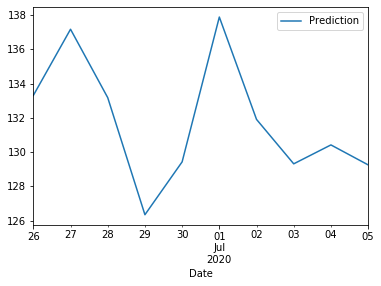

In [280]:
forecast_df.plot()

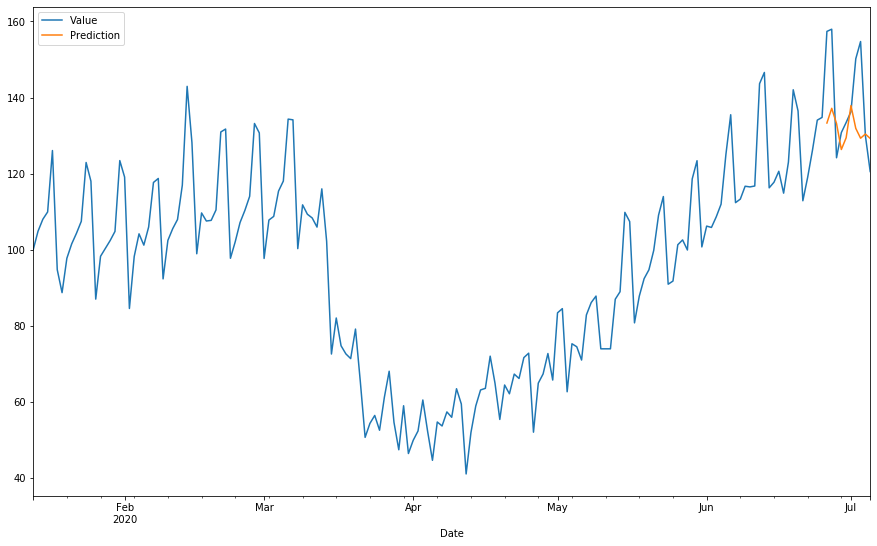

In [287]:
temp1=temp1[['Date', 'Value']]
temp1.set_index("Date", inplace = True) 
pd.concat([temp1['Value'],forecast_df],axis=1).plot(figsize=(15,9))

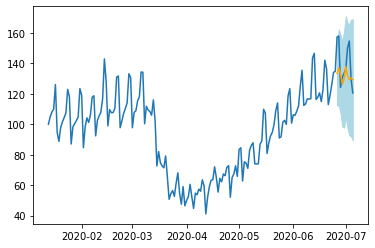

In [291]:
plt.plot(temp1['Value'])
plt.plot(forecast_df,color='orange')
plt.fill_between(forecast_range,
                  lower,
                  upper,color='lightblue')

In [374]:
file="C:\\Users\\aravindh.saravanan\\Desktop\\dashboard refresh\\Global_Mobility_Report.csv"
data=pd.read_csv(file)
data.columns


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [375]:
data=data[(data["country_region_code"]=="US")&(~data.sub_region_1.isnull())&(data.sub_region_2.isnull())]

In [376]:
data["date"]=pd.to_datetime(data['date'])

In [377]:
data=data[data["sub_region_1"]=="Delaware"]

In [378]:
data["retail_and_recreation_percent_change_from_baseline"] = data["retail_and_recreation_percent_change_from_baseline"].fillna(method = 'ffill')

In [379]:
temp2=data[data['date']<='2020-06-25']
test1=data[data['date']>'2020-06-25']

In [380]:
test1=test1[['date', 'retail_and_recreation_percent_change_from_baseline']]
temp2=temp2[['date', 'retail_and_recreation_percent_change_from_baseline']]
test1.set_index("date", inplace = True) 
temp2.set_index("date", inplace = True)

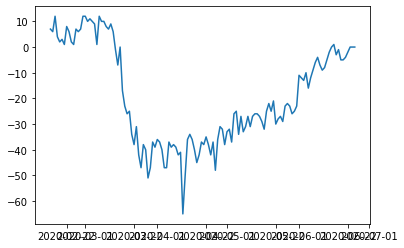

In [381]:
plt.plot(temp2["retail_and_recreation_percent_change_from_baseline"])

In [382]:
model = pm.auto_arima(temp2["retail_and_recreation_percent_change_from_baseline"],
                      m = 7, seasonal = True,
                      start_p = 0,start_q=0,max_order=4,test='adf',error_action = 'ignore',
                      suppress_warnings =True,
                      stepwise =True,trace = True)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,7) [intercept=True]; AIC=817.583, BIC=829.084, Time=0.125 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=True]; AIC=828.031, BIC=833.782, Time=0.010 seconds
Fit ARIMA(1,1,0)x(1,0,0,7) [intercept=True]; AIC=816.556, BIC=828.057, Time=0.077 seconds
Fit ARIMA(0,1,1)x(0,0,1,7) [intercept=True]; AIC=816.063, BIC=827.564, Time=0.068 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=False]; AIC=826.043, BIC=828.918, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,7) [intercept=True]; AIC=821.884, BIC=830.509, Time=0.024 seconds
Fit ARIMA(0,1,1)x(1,0,1,7) [intercept=True]; AIC=808.626, BIC=823.001, Time=0.130 seconds
Fit ARIMA(0,1,1)x(1,0,0,7) [intercept=True]; AIC=811.648, BIC=823.149, Time=0.066 seconds
Fit ARIMA(0,1,1)x(2,0,1,7) [intercept=True]; AIC=807.996, BIC=825.247, Time=0.172 seconds
Fit ARIMA(0,1,1)x(2,0,0,7) [intercept=True]; AIC=806.176, BIC=820.552, Time=0.158 seconds
Fit ARIMA(0,1,0)x(2,0,0,7) [intercept=True]; AIC=814.263

In [184]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  147
Model:             SARIMAX(2, 1, 0)x(2, 0, [1], 10)   Log Likelihood                -396.620
Date:                              Thu, 16 Jul 2020   AIC                            807.241
Time:                                      11:49:58   BIC                            828.126
Sample:                                           0   HQIC                           815.727
                                              - 147                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2533      0.646      0.392      0.695      -1.013       1.519
ar.L1         -0.4376      0.049     -8.941      0.000      -0.534      -0.342
ar.L2         -0.7432      0.055    -13.490      0.000      -0.851      -0.635
ar.S.L10      -1.4996      0.236     -6.349      0.000      -1.963      -1.037
ar.S.L20      -0.5934      0.114     -5.198      0.000      -0.817      -0.370
ma.S.L10       0.9871      1.688      0.585      0.559      -2.322       4.296
sigma2        12.2096     18.057      0.676      0.499     -23.181      47.600
===================================================================================
Ljung-Box (Q):                      336.58   Jarque-Bera (JB):                 1.01
Prob(Q):                              0.00   Prob(JB):                         0.60
Heteroskedasticity (H):               1.50   Skew:                             0.13
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [384]:
test1.shape

(8, 1)

In [385]:
forecast = model.predict(n_periods=8,return_conf_int=True)

In [386]:
forecast_range = pd.date_range(start='2020-06-26',periods=8,freq='D')

In [387]:
lower = pd.Series(forecast[1][:,0],index=forecast_range)
upper = pd.Series(forecast[1][:,1],index=forecast_range)

In [388]:
forecast_df = pd.DataFrame(forecast[0],index=test1.index,columns=['Prediction'])
forecast_df

,Prediction
date,
2020-06-26,-1.115800
2020-06-27,-0.277601
2020-06-28,0.755071
2020-06-29,1.638636
2020-06-30,2.325188
2020-07-01,1.357676
2020-07-02,1.834578
2020-07-03,0.593856


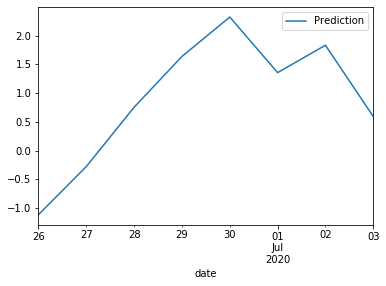

In [389]:
forecast_df.plot()

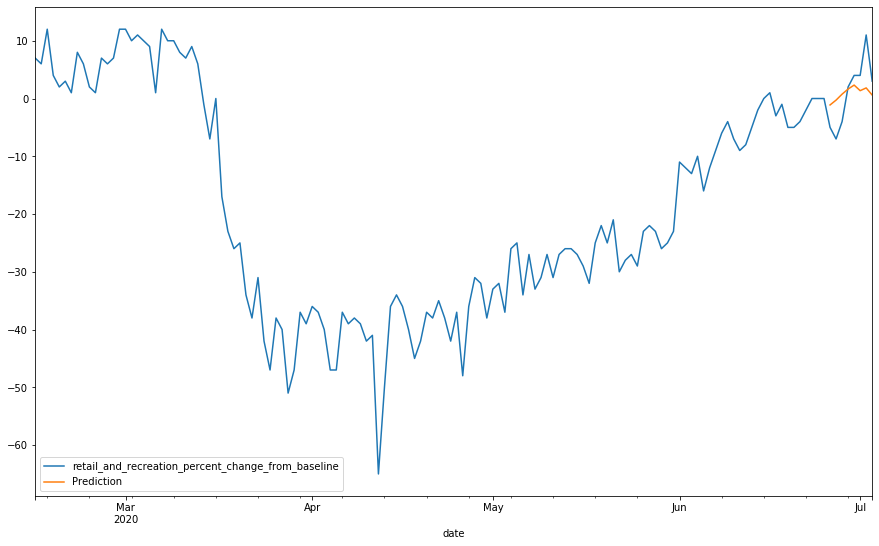

In [390]:
temp1=data[['date', 'retail_and_recreation_percent_change_from_baseline']]
temp1.set_index("date", inplace = True) 
pd.concat([temp1['retail_and_recreation_percent_change_from_baseline'],forecast_df],axis=1).plot(figsize=(15,9))

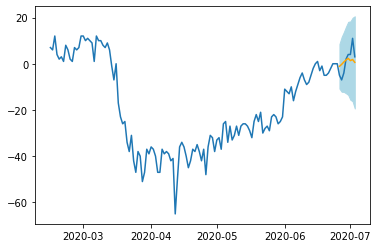

In [391]:
plt.plot(temp1['retail_and_recreation_percent_change_from_baseline'])
plt.plot(forecast_df,color='orange')
plt.fill_between(forecast_range,
                  lower,
                  upper,color='lightblue')

In [399]:
cdata=pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

In [400]:
cdata.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [9]:
print(mydb)

In [14]:
mycursor = mydb.cursor()



In [69]:
file="C:\\Users\\kasthurirangan.sampa\\Downloads\\HW_AppEvents_Jun28_to_Jul04_UTC.csv"

In [70]:
data=pd.read_csv(file,dtype={'fl_attribute_sub2': 'str'})

In [74]:
data=data[data['event_name']=='Page']

In [55]:
val=data.fl_attribute_sub2.unique()

In [56]:
val

array(['8314114883868320', '7678519642615939', '555655474', ...,
       '303725202157617863', '1315542769359835', '8593011482615514918'],
      dtype=object)

In [58]:
out=pd.DataFrame(val,columns=['fl_attribute_sub2'])

In [62]:
out.head()

,fl_attribute_sub2
0,8314114883868320
1,7678519642615939
2,555655474
3,7127659921589497393
4,2494715402158438483


In [66]:
out['query']="INSERT INTO kass_client_id_dtls values('"+out["fl_attribute_sub2"]+"');"

In [67]:
out.head()

,fl_attribute_sub2,query
0,8314114883868320,INSERT INTO kass_client_id_dtls values('831411...
1,7678519642615939,INSERT INTO kass_client_id_dtls values('767851...
2,555655474,INSERT INTO kass_client_id_dtls values('555655...
3,7127659921589497393,INSERT INTO kass_client_id_dtls values('712765...
4,2494715402158438483,INSERT INTO kass_client_id_dtls values('249471...


In [75]:
data.head()

,user_id,fl_attribute_sub2,event_name,event_timestamp
0,70797a23-5e00-428c-85c9-18e86c032cbe,141534963632622812,Page,2020-07-02 15:56:09.000
3,9c9286f2-e851-4aac-af2e-7bf87a1991e2,7290687646300464620,Page,2020-07-01 21:14:25.000
4,b421906f-4de0-45b3-b19f-c0c716d5a460,7803440047002877,Page,2020-07-02 15:31:12.000
5,aa16afc9-237a-4286-920d-ae3b26223339,2673595630741082468,Page,2020-07-04 14:19:21.000
6,8e40d77c-c717-4edc-8d28-d8df561b84a7,3674627779902691870,Page,2020-07-04 02:33:45.000


In [98]:
data.to_csv("C:\\Users\\kasthurirangan.sampa\\Downloads\\client_id.csv")

In [77]:
data["event_timestamp"]=pd.to_datetime(data["event_timestamp"])

In [79]:
data.dtypes

user_id                      object
fl_attribute_sub2            object
event_name                   object
event_timestamp      datetime64[ns]
dtype: object

In [80]:
data["date"]=pd.to_datetime(data["event_timestamp"]).apply(lambda x: x.date())